Sentiment Analysis of Covid-19 Vaccine tweets

In [1]:
#installs
#!pip install textblob
#!pip install wordcloud
#!python -m textblob.download_corpora
#!pip install plotly
#!pip install wordninja
#!pip install pyspellchecker
#!pip install vaderSentiment

 Data Access

In [1]:
 #Data Access
import os
import tweepy as tw
import re 
import nltk
import string
from tweepy import OAuthHandler 
from textblob import TextBlob
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import numpy as np
from wordcloud import STOPWORDS
import random
#get most commonest keywords
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
auth =tw.OAuthHandler(consumer_key, consumer_secret)
        
# set access_token and access_token_secret
auth.set_access_token(access_token, access_token_secret) 
        
# creating tweepy API object to fetch tweets
api = tw.API(auth)
search_words = "#COVID19Vaccination"
date_since="2020-04-11"
tweets = tw.Cursor(api.search,
                  q=search_words,
                  lang='en',
                  since=date_since).items(2000)

In [ ]:
tweets

In [ ]:
#tweet details
tweet_details = [[tweet.id,tweet.user.name,tweet.user.description,tweet.created_at,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,tweet.user.verified,tweet.text,tweet.source,tweet.retweet_count,tweet.retweeted, tweet.user.location] for tweet in tweets]
#creating tweet_df dataframe
tweet_df = pd.DataFrame(data=tweet_details, columns=['id','name','description','created_at','followers_count','friends_count','favourites_count','verified', 'text','source','retweet_count','retweeted', 'location'])

In [ ]:
#tweet_df.to_csv('temp_tweets.csv')

In [2]:
tweet_df = pd.read_csv("final_tweets.csv")

In [3]:
tweet_df

id                               name  \
0      1.400000e+18              SAM Global University   
1      1.400000e+18                      VIKAS SAHU 🇮🇳   
2      1.400000e+18                       Forbes India   
3      1.400000e+18                      Sam Maina 🧩🇰🇪   
4      1.400000e+18                  Ajay kumar maurya   
...             ...                                ...   
83713  1.402890e+18                     Rasheed Kappan   
83714  1.402890e+18               Radio Northumberland   
83715  1.402890e+18                          Lucky..!!   
83716  1.402890e+18  Namami Gange | #IndiaFightsCorona   
83717  1.402890e+18            Renewable Power Systems   

                                             description        created_at  \
0      SAM Global University is in education sector f...  09-06-2021 08:53   
1      #Nation_First !! God is the best part of my li...  09-06-2021 08:48   
2      Bringing you the best conversations on Indian ...  09-06-2021 08:44   
3      #IT and #DigitalSecurity at @pi_africahub.\nhu...  09-06-2021 08:44   
4      HINDU/\nM.A Economics/\nNation first/ सत्यमेव ...  09-06-2021 08:44   
...                                                  ...               ...   
83713  Journalist covering urban issues, Deccan Heral...  10-06-2021 07:36   
83714  Radio For Northumberland https://t.co/LSXCE67l...  10-06-2021 07:34   
83715           HIDE your PLANS..\nREVEAL your SUCCESS..  10-06-2021 07:33   
83716  National Mission for Clean Ganga under the Min...  10-06-2021 07:33   
83717  We serve water and power plants\n• Diesel Gene...  10-06-2021 07:31   

       followers_count  friends_count  favourites_count  verified  \
0                  109            117                16     False   
1                 1153            754              2480     False   
2              1277488            778              2501      True   
3                 2553           2262               232     False   
4                   65            200             12209     False   
...                ...            ...               ...       ...   
83713           112465          52271              6571      True   
83714            11092           3862             10467     False   
83715               26             78               127     False   
83716            72267             90              2417      True   
83717             2714           4959             17088     False   

                                                    text               source  \
0      Get vaccinated at the COVID19 Vaccination Cent...      Twitter Web App   
1      RT @AmitSahuBjp: #MediaCovrage Of Meeting With...   Twitter for iPhone   
2      Yash Raj Films (@yrf) aims to inoculate 30,000...            TweetDeck   
3      RT @PI_AfricaHub: Vaccination for all should b...      Twitter Web App   
4      RT @bharatpeindia: Navigate through the vaccin...  Twitter for Android   
...                                                  ...                  ...   
83713  RT @DeccanHerald: #Mysuru tops the vaccination...  Twitter for Android   
83714  N_landCouncil: RT @NHSNlandCCG: Aged 25-29❓\n\...                IFTTT   
83715  RT @IndiaToday: Policemen in #MadhyaPradesh ar...  Twitter for Android   
83716  To win the battle against #COVID19, we must pr...  Twitter for Android   
83717  RT @airnewsalerts: #COVID19Vaccination | If I ...                IFTTT   

       retweet_count  retweeted               location  
0                  0      False                 Bhopal  
1                  6      False  🇮🇳 Rajim,Chhattisgarh  
2                  0      False                  India  
3                  1      False         Nairobi, Kenya  
4                  1      False   Uttarakhand Rudrapur  
...              ...        ...                    ...  
83713              4      False              Bangalore  
83714              0      False  #MadeInNorthumberland  
83715             10      False                    NaN  
83716      

In [4]:
tweet_df.shape

(83718, 13)

In [8]:
pd.set_option('max_colwidth', 1000)
tweet_df.head(20)

id                                 name  \
0   1.400000e+18                SAM Global University   
1   1.400000e+18                        VIKAS SAHU 🇮🇳   
2   1.400000e+18                         Forbes India   
3   1.400000e+18                        Sam Maina 🧩🇰🇪   
4   1.400000e+18                    Ajay kumar maurya   
5   1.400000e+18                          Belen Lopez   
6   1.400000e+18                        PIB in KERALA   
7   1.400000e+18                     Sunil kumar sahu   
8   1.400000e+18                          Helen Lowey   
9   1.400000e+18  Medicus Mundi International Network   
10  1.400000e+18                        VIPIN SAHU 🇮🇳   
11  1.400000e+18                  The Mason Institute   
12  1.400000e+18                       Sharan Roongta   
13  1.400000e+18                    iamsurabhijayaram   
14  1.400000e+18                  BJYM JANJGIR-CHAMPA   
15  1.400000e+18                           Arun Tandi   
16  1.400000e+18                               Fobvns   
17  1.400000e+18                        Amitesh Singh   
18  1.400000e+18                     Itai Josh Rusike   
19  1.400000e+18                             BharatPe   

                                                                                                                                                           description  \
0     SAM Global University is in education sector for 4+decades. SAM provides experienced faculty, good campus, and great infrastructure for your overall development   
1                                                       #Nation_First !! God is the best part of my life !! STATE TRAINING HEAD @BJYM CHHATTISGARH (Youth Wing Of BJP)   
2     Bringing you the best conversations on Indian and international business, in alliance with @Forbes. Run by our journalists. Read more at https://t.co/OUv9Xftzyy   
3              #IT and #DigitalSecurity at @pi_africahub.\nhuman rights | digital rights | all rights | autism dad |\ntweets = personal views | retweets ≠ endorsement   
4                                                                                                                   HINDU/\nM.A Economics/\nNation first/ सत्यमेव जयते   
5                                                                                   Lawyer, B.A. Int. Rel., MBA, postgraduate Human Rights, LLM Medical Law and Ethics   
6                                                                                       Official Twitter Account of Press Information Bureau, Govt of India, in Kerala   
7                                                      Nationalist/Student leader/Microbiologist..भारतीय जनता युवा मोर्चा जिला विशेष आमंत्रित सदस्य बिलासपुर छत्तीसगढ़।   
8                                                            Director of Public Health at Bolton Council. All views & opinions are mine. Retweets are not endorsements   
9      Health governance, health cooperation, determinants of health/policies: Updates by MMI secretariat, also proudly co-hosting #kampalainitiative and @g2h2_geneva   
10                                                                       प्रदेश संयोजक (सोशल मीडिया) - भारतीय जनता युवा मोर्चा छत्तीसगढ़\n\n\n\nhttps://t.co/qmn2K8dDFl   
11                                                       Interdisciplinary research hub addressing legal, ethical and social implications of medicine & life sciences.   
12                                                                                                                                                                 NaN   
13  Digital Creator\nFree Thinker,\nDigital Marketer, SEO, SEM, Lead generation, Guerilla Marketing, \nKannada Poetry,15mn+ impressions\n\n\n#father #work #influencer   
14                                                                                                                                                                 NaN   
15                                                                                              

In [9]:
tweet_df['text'].head(20)

0                   Get vaccinated at the COVID19 Vaccination Centre @SAM College of Nursing #VaccinateTodayWithSAM #CovidIndia… https://t.co/kp6pFqwJJ9
1          RT @AmitSahuBjp: #MediaCovrage Of Meeting With Honorable @GovernorCG Of Chhattisgarh..\nIn The Subject Of All Students 12th Class About Thei…
2           Yash Raj Films (@yrf) aims to inoculate 30,000 technicians and crew members in phases. This will enable them to res… https://t.co/s93vokno18
3           RT @PI_AfricaHub: Vaccination for all should be in the Kenya budget and in all African states budgets this year. For Kenya, only KES 35 bil…
4           RT @bharatpeindia: Navigate through the vaccination process easily with these tips. Book your slot now and get vaccinated if you haven't al…
5      RT @masonInstitute: ***1 WEEK TO GO ***\nStill Time to Register - Open Webinar #COVID19Vaccination in UK &amp; Ireland: Ethics in Practice' Date…
6           In a move to further facilitate vaccination for persons with disabilit

Data Preprocessing

In [3]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [4]:
 def clean_tweets(text):
    text=text.lower()                                               #lowercases the string
    text = re.sub('@[^\s]+', '', text)                              # Removes usernames
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)   # Remove URLs
    text = re.sub("RT @[\w]*","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub(r"\d+", " ", str(text))                           # Removes all digits 
    text = emoji(text)                                              # Replaces Emojis
    text = re.sub(r"\b[a-zA-Z]\b", "", str(text))                   # Removes all single characters
    text = re.sub("\n","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text=re.sub("#[\w]*","",text)                                     #Removes all hashtags
    stop_words = set(stopwords.words('english'))                      #Stopword Removal
    word_tokens = word_tokenize(text) 
    l = [w for w in word_tokens if not w in stop_words]
    c1= ' '.join(l)
    words=word_tokenize(c1)
    ps = PorterStemmer()                                             #Stemming
    filtered_sentence=[]
    for w in words:
            filtered_sentence.append(ps.stem(w))
    text=' '.join(filtered_sentence)
    for punctuation in string.punctuation:                           #Removing punctuations
        text = text.replace(punctuation, '')
       
    return text
 
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df.head(20)

id                                 name  \
0   1.400000e+18                SAM Global University   
1   1.400000e+18                        VIKAS SAHU 🇮🇳   
2   1.400000e+18                         Forbes India   
3   1.400000e+18                        Sam Maina 🧩🇰🇪   
4   1.400000e+18                    Ajay kumar maurya   
5   1.400000e+18                          Belen Lopez   
6   1.400000e+18                        PIB in KERALA   
7   1.400000e+18                     Sunil kumar sahu   
8   1.400000e+18                          Helen Lowey   
9   1.400000e+18  Medicus Mundi International Network   
10  1.400000e+18                        VIPIN SAHU 🇮🇳   
11  1.400000e+18                  The Mason Institute   
12  1.400000e+18                       Sharan Roongta   
13  1.400000e+18                    iamsurabhijayaram   
14  1.400000e+18                  BJYM JANJGIR-CHAMPA   
15  1.400000e+18                           Arun Tandi   
16  1.400000e+18                               Fobvns   
17  1.400000e+18                        Amitesh Singh   
18  1.400000e+18                     Itai Josh Rusike   
19  1.400000e+18                             BharatPe   

                                          description        created_at  \
0   SAM Global University is in education sector f...  09-06-2021 08:53   
1   #Nation_First !! God is the best part of my li...  09-06-2021 08:48   
2   Bringing you the best conversations on Indian ...  09-06-2021 08:44   
3   #IT and #DigitalSecurity at @pi_africahub.\nhu...  09-06-2021 08:44   
4   HINDU/\nM.A Economics/\nNation first/ सत्यमेव ...  09-06-2021 08:44   
5   Lawyer, B.A. Int. Rel., MBA, postgraduate Huma...  09-06-2021 08:43   
6   Official Twitter Account of Press Information ...  09-06-2021 08:43   
7   Nationalist/Student leader/Microbiologist..भार...  09-06-2021 08:42   
8   Director of Public Health at Bolton Council. A...  09-06-2021 08:41   
9   Health governance, health cooperation, determi...  09-06-2021 08:41   
10  प्रदेश संयोजक (सोशल मीडिया) - भारतीय जनता युवा...  09-06-2021 08:40   
11  Interdisciplinary research hub addressing lega...  09-06-2021 08:40   
12                                                NaN  09-06-2021 08:38   
13  Digital Creator\nFree Thinker,\nDigital Market...  09-06-2021 08:33   
14                                                NaN  09-06-2021 08:32   
15    Member Bhartiya Janata Yuwa Morcha Chhattisgarh  09-06-2021 08:32   
16                                                NaN  09-06-2021 08:32   
17  भारतीय जनता युवा मोर्चा मण्डल अध्यक्ष कोंटा, ज...  09-06-2021 08:30   
18  Executive Director- CWGH-ZIMBABWE. Public Heal...  09-06-2021 08:29   
19  BharatPe is India's leading merchant payment c...  09-06-2021 08:28   

    followers_count  friends_count  favourites_count  verified  \
0               109            117                16     False   
1              1153            754              2480     False   
2           1277488            778              2501      True   
3              2553           2262               232     False   
4                65            200             12209     False   
5               777           1424              1148     False   
6              7533            247               324      True   
7              1405            592            306798     False   
8              2392           1762              9020     False   
9              3727            515                 2     False   
10             1399            404              7977     False   
11             2833           2264              3937     False   
12                7             23                24     False   
13               66            543               182     False   
14               62             28               125     False   
15                6             22               394     False   
16                3              6                 3     False   
17              717            409             83747

In [7]:
tweet_df['text']

0              get vaccin covid vaccin centr colleg nurs …
1        rt meet honor chhattisgarhin subject student t...
2        yash raj film  aim inocul  technician crew mem...
3        rt vaccin kenya budget african state budget ye...
4        rt navig vaccin process easili tip  book slot ...
                               ...                        
83713    rt top vaccin list among district  lakh dose a...
83714           nlandcouncil  rt age  ❓you book vaccin  💉💻
83715    rt policemen conduct random check road found v...
83716         win battl  must protect other follow  donts…
83717    rt vaccin  contract covid  mani day get vaccin...
Name: text, Length: 83718, dtype: object

Exploratory Data Analysis (EDA)

In [13]:
tweet_df.head(20)

id                                 name  \
0   1.400000e+18                SAM Global University   
1   1.400000e+18                        VIKAS SAHU 🇮🇳   
2   1.400000e+18                         Forbes India   
3   1.400000e+18                        Sam Maina 🧩🇰🇪   
4   1.400000e+18                    Ajay kumar maurya   
5   1.400000e+18                          Belen Lopez   
6   1.400000e+18                        PIB in KERALA   
7   1.400000e+18                     Sunil kumar sahu   
8   1.400000e+18                          Helen Lowey   
9   1.400000e+18  Medicus Mundi International Network   
10  1.400000e+18                        VIPIN SAHU 🇮🇳   
11  1.400000e+18                  The Mason Institute   
12  1.400000e+18                       Sharan Roongta   
13  1.400000e+18                    iamsurabhijayaram   
14  1.400000e+18                  BJYM JANJGIR-CHAMPA   
15  1.400000e+18                           Arun Tandi   
16  1.400000e+18                               Fobvns   
17  1.400000e+18                        Amitesh Singh   
18  1.400000e+18                     Itai Josh Rusike   
19  1.400000e+18                             BharatPe   

                                                                                                                                                           description  \
0     SAM Global University is in education sector for 4+decades. SAM provides experienced faculty, good campus, and great infrastructure for your overall development   
1                                                       #Nation_First !! God is the best part of my life !! STATE TRAINING HEAD @BJYM CHHATTISGARH (Youth Wing Of BJP)   
2     Bringing you the best conversations on Indian and international business, in alliance with @Forbes. Run by our journalists. Read more at https://t.co/OUv9Xftzyy   
3              #IT and #DigitalSecurity at @pi_africahub.\nhuman rights | digital rights | all rights | autism dad |\ntweets = personal views | retweets ≠ endorsement   
4                                                                                                                   HINDU/\nM.A Economics/\nNation first/ सत्यमेव जयते   
5                                                                                   Lawyer, B.A. Int. Rel., MBA, postgraduate Human Rights, LLM Medical Law and Ethics   
6                                                                                       Official Twitter Account of Press Information Bureau, Govt of India, in Kerala   
7                                                      Nationalist/Student leader/Microbiologist..भारतीय जनता युवा मोर्चा जिला विशेष आमंत्रित सदस्य बिलासपुर छत्तीसगढ़।   
8                                                            Director of Public Health at Bolton Council. All views & opinions are mine. Retweets are not endorsements   
9      Health governance, health cooperation, determinants of health/policies: Updates by MMI secretariat, also proudly co-hosting #kampalainitiative and @g2h2_geneva   
10                                                                       प्रदेश संयोजक (सोशल मीडिया) - भारतीय जनता युवा मोर्चा छत्तीसगढ़\n\n\n\nhttps://t.co/qmn2K8dDFl   
11                                                       Interdisciplinary research hub addressing legal, ethical and social implications of medicine & life sciences.   
12                                                                                                                                                                 NaN   
13  Digital Creator\nFree Thinker,\nDigital Marketer, SEO, SEM, Lead generation, Guerilla Marketing, \nKannada Poetry,15mn+ impressions\n\n\n#father #work #influencer   
14                                                                                                                                                                 NaN   
15                                                                                              

In [14]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83718 entries, 0 to 83717
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                83718 non-null  float64
 1   name              83714 non-null  object 
 2   description       77042 non-null  object 
 3   created_at        83718 non-null  object 
 4   followers_count   83718 non-null  int64  
 5   friends_count     83718 non-null  int64  
 6   favourites_count  83718 non-null  int64  
 7   verified          83718 non-null  bool   
 8   text              83718 non-null  object 
 9   source            83599 non-null  object 
 10  retweet_count     83718 non-null  int64  
 11  retweeted         83718 non-null  bool   
 12  location          64211 non-null  object 
dtypes: bool(2), float64(1), int64(4), object(6)
memory usage: 7.2+ MB


In [15]:
tweet_df.dtypes

id                  float64
name                 object
description          object
created_at           object
followers_count       int64
friends_count         int64
favourites_count      int64
verified               bool
text                 object
source               object
retweet_count         int64
retweeted              bool
location             object
dtype: object

In [16]:
tweet_df.columns

Index(['id', 'name', 'description', 'created_at', 'followers_count',
       'friends_count', 'favourites_count', 'verified', 'text', 'source',
       'retweet_count', 'retweeted', 'location'],
      dtype='object')

In [17]:
tweet_df.name.value_counts()

Workout Solutions     2080
Sputnik                352
Xukki🌍                 246
China Economy          244
Sputnik V              219
                      ... 
Peter Zeihan             1
Stuart McAllister        1
Kyle Chak                1
Gurajpal Sangha          1
Alana Daly O’Brien       1
Name: name, Length: 41539, dtype: int64

In [18]:
 tweet_df['name'].value_counts().nlargest(30)

Workout Solutions            2080
Sputnik                       352
Xukki🌍                        246
China Economy                 244
Sputnik V                     219
William Owen                  177
Covid Vaccine Victims         174
MaryRobotic                   164
ILKHA                         151
Shen Shiwei沈诗伟                145
Tradia Inc                    143
People's Daily, China         136
Gregor Makarian               126
Transformative.today          105
PIRAT🏴‍☠️NEWS                 104
ChineseEmbassyManila          101
New Straits Times             100
CGTN                           98
The Peninsula Qatar            91
Free Press Journal             90
Brazil SFE                     90
LatestLY                       90
CNBC-TV18                      86
IndiaToday                     84
CCTV+                          84
Rhombics Board Game            81
ഋഷികേശ്./Rishikesh ॐ. BJP      79
RT                             79
People's Daily app             78
Business Stand

In [19]:
tweet_df.describe()

id  followers_count  friends_count  favourites_count  \
count  8.371800e+04     8.371800e+04   83718.000000      8.371800e+04   
mean   1.376550e+18     9.120668e+04    1274.111302      1.713227e+04   
std    1.413433e+16     7.813283e+05    7018.411477      4.723166e+04   
min    1.340000e+18     0.000000e+00       0.000000      0.000000e+00   
25%    1.370000e+18     1.060000e+02     139.000000      4.040000e+02   
50%    1.380000e+18     5.080000e+02     383.000000      2.509500e+03   
75%    1.380000e+18     2.318000e+03    1106.000000      1.262675e+04   
max    1.403970e+18     1.504513e+07  570592.000000      1.353496e+06   

       retweet_count  
count   83718.000000  
mean       11.349089  
std       158.041300  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         2.000000  
max     12983.000000

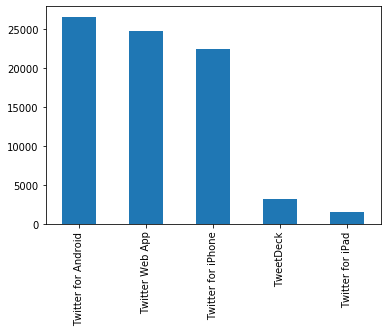

In [20]:
 # which device are people tweeting about the vaccine from?
tweet_df['source'].value_counts().head(n=5).plot.bar()

In [22]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 55356 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 57101 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 27784 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 35799 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 20255 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 57332 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 3339 missing from current font.

C:\ProgramData\Anacon

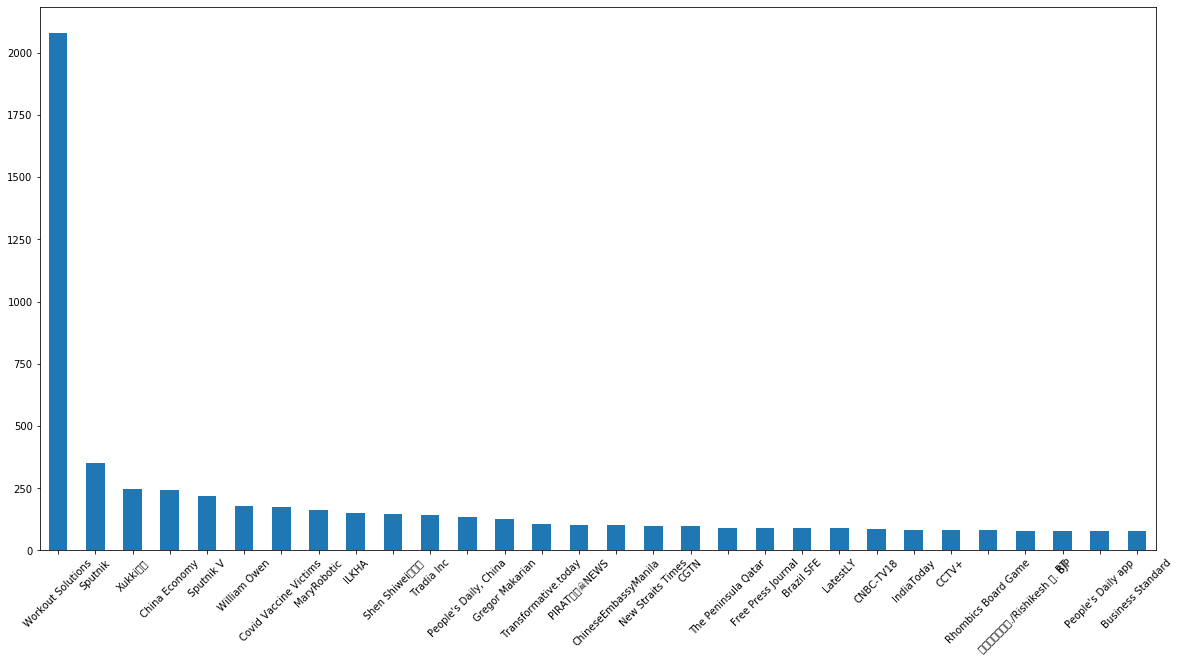

In [23]:
#on the basis of user
plt.figure(figsize=(20,10))
tweet_df['name'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [24]:
 tweet_df[tweet_df['retweeted'] == False].head()

id                   name  \
0  1.400000e+18  SAM Global University   
1  1.400000e+18          VIKAS SAHU 🇮🇳   
2  1.400000e+18           Forbes India   
3  1.400000e+18          Sam Maina 🧩🇰🇪   
4  1.400000e+18      Ajay kumar maurya   

                                                                                                                                                        description  \
0  SAM Global University is in education sector for 4+decades. SAM provides experienced faculty, good campus, and great infrastructure for your overall development   
1                                                    #Nation_First !! God is the best part of my life !! STATE TRAINING HEAD @BJYM CHHATTISGARH (Youth Wing Of BJP)   
2  Bringing you the best conversations on Indian and international business, in alliance with @Forbes. Run by our journalists. Read more at https://t.co/OUv9Xftzyy   
3           #IT and #DigitalSecurity at @pi_africahub.\nhuman rights | digital rights | all rights | autism dad |\ntweets = personal views | retweets ≠ endorsement   
4                                                                                                                HINDU/\nM.A Economics/\nNation first/ सत्यमेव जयते   

         created_at  followers_count  friends_count  favourites_count  \
0  09-06-2021 08:53              109            117                16   
1  09-06-2021 08:48             1153            754              2480   
2  09-06-2021 08:44          1277488            778              2501   
3  09-06-2021 08:44             2553           2262               232   
4  09-06-2021 08:44               65            200             12209   

   verified  \
0     False   
1     False   
2      True   
3     False   
4     False   

                                                                  text  \
0                          get vaccin covid vaccin centr colleg nurs …   
1          rt meet honor chhattisgarhin subject student th class thei…   
2  yash raj film  aim inocul  technician crew member phase  enabl res…   
3     rt vaccin kenya budget african state budget year  kenya  ke bil…   
4        rt navig vaccin process easili tip  book slot get vaccin  al…   

                source  retweet_count  retweeted               location  
0      Twitter Web App              0      False                 Bhopal  
1   Twitter for iPhone              6      False  🇮🇳 Rajim,Chhattisgarh  
2            TweetDeck              0      False                  India  
3      Twitter Web App              1      False         Nairobi, Kenya  
4  Twitter for Android              1      False   Uttarakhand Rudrapur

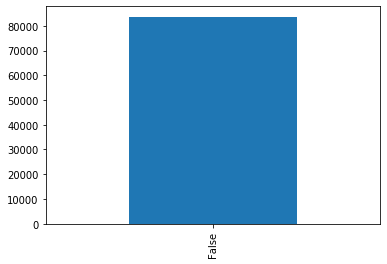

In [25]:
 tweet_df['retweeted'].value_counts().head(n=10).plot.bar()

Sentiment Analysis

In [8]:
#using Vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PRASANTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
sid = SentimentIntensityAnalyzer()
tweet_df['sentiment_results']=tweet_df['text'].apply(lambda x:sid.polarity_scores(x))
tweet_df.head(10)

id                                 name  \
0  1.400000e+18                SAM Global University   
1  1.400000e+18                        VIKAS SAHU 🇮🇳   
2  1.400000e+18                         Forbes India   
3  1.400000e+18                        Sam Maina 🧩🇰🇪   
4  1.400000e+18                    Ajay kumar maurya   
5  1.400000e+18                          Belen Lopez   
6  1.400000e+18                        PIB in KERALA   
7  1.400000e+18                     Sunil kumar sahu   
8  1.400000e+18                          Helen Lowey   
9  1.400000e+18  Medicus Mundi International Network   

                                         description        created_at  \
0  SAM Global University is in education sector f...  09-06-2021 08:53   
1  #Nation_First !! God is the best part of my li...  09-06-2021 08:48   
2  Bringing you the best conversations on Indian ...  09-06-2021 08:44   
3  #IT and #DigitalSecurity at @pi_africahub.\nhu...  09-06-2021 08:44   
4  HINDU/\nM.A Economics/\nNation first/ सत्यमेव ...  09-06-2021 08:44   
5  Lawyer, B.A. Int. Rel., MBA, postgraduate Huma...  09-06-2021 08:43   
6  Official Twitter Account of Press Information ...  09-06-2021 08:43   
7  Nationalist/Student leader/Microbiologist..भार...  09-06-2021 08:42   
8  Director of Public Health at Bolton Council. A...  09-06-2021 08:41   
9  Health governance, health cooperation, determi...  09-06-2021 08:41   

   followers_count  friends_count  favourites_count  verified  \
0              109            117                16     False   
1             1153            754              2480     False   
2          1277488            778              2501      True   
3             2553           2262               232     False   
4               65            200             12209     False   
5              777           1424              1148     False   
6             7533            247               324      True   
7             1405            592            306798     False   
8             2392           1762              9020     False   
9             3727            515                 2     False   

                                                text               source  \
0        get vaccin covid vaccin centr colleg nurs …      Twitter Web App   
1  rt meet honor chhattisgarhin subject student t...   Twitter for iPhone   
2  yash raj film  aim inocul  technician crew mem...            TweetDeck   
3  rt vaccin kenya budget african state budget ye...      Twitter Web App   
4  rt navig vaccin process easili tip  book slot ...  Twitter for Android   
5  rt  week go still time regist  open webinar va...   Twitter for iPhone   
6  move facilit vaccin person disabl  govt allow ...      Twitter Web App   
7  rt meet honor chhattisgarhin subject student t...  Twitter for Android   
8  impact pandem children  amp  young peopl enorm...  Twitter for Android   
9  rt vaccin campaign messag billboard along chit...      Twitter Web App   

   retweet_count  retweeted                       location  \
0              0      False                         Bhopal   
1              6      False          🇮🇳 Rajim,Chhattisgarh   
2              0      False                          India   
3              1      False                 Nairobi, Kenya   
4              1      False           Uttarakhand Rudrapur   
5              1      False             Cambridge, England   
6              0      False              Trivandrum, India   
7              6      False  तखतपुर बिलासपुर छत्तीसगढ़ भारत   
8              0      False                            NaN   
9              1      False                         global   

                                   sentiment_results  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
5  {

In [6]:
#let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
def get_tweet_sentiment(text):
    blob=TextBlob(text)
    sentiment_polarity=blob.sentiment.polarity
    sentiment_subjectivity=blob.sentiment.subjectivity
    if sentiment_polarity>0:
        sentiment_label='positive'
    elif sentiment_polarity<0:
        sentiment_label='negative'
    else:
        sentiment_label='neutral'
    res=sentiment_label
   
    return res

In [7]:
 tweet_df['sentiment']=tweet_df['text'].apply(get_tweet_sentiment)

In [30]:
tweet_df

id                               name  \
0      1.400000e+18              SAM Global University   
1      1.400000e+18                      VIKAS SAHU 🇮🇳   
2      1.400000e+18                       Forbes India   
3      1.400000e+18                      Sam Maina 🧩🇰🇪   
4      1.400000e+18                  Ajay kumar maurya   
...             ...                                ...   
83713  1.402890e+18                     Rasheed Kappan   
83714  1.402890e+18               Radio Northumberland   
83715  1.402890e+18                          Lucky..!!   
83716  1.402890e+18  Namami Gange | #IndiaFightsCorona   
83717  1.402890e+18            Renewable Power Systems   

                                                                                                                                                            description  \
0      SAM Global University is in education sector for 4+decades. SAM provides experienced faculty, good campus, and great infrastructure for your overall development   
1                                                        #Nation_First !! God is the best part of my life !! STATE TRAINING HEAD @BJYM CHHATTISGARH (Youth Wing Of BJP)   
2      Bringing you the best conversations on Indian and international business, in alliance with @Forbes. Run by our journalists. Read more at https://t.co/OUv9Xftzyy   
3               #IT and #DigitalSecurity at @pi_africahub.\nhuman rights | digital rights | all rights | autism dad |\ntweets = personal views | retweets ≠ endorsement   
4                                                                                                                    HINDU/\nM.A Economics/\nNation first/ सत्यमेव जयते   
...                                                                                                                                                                 ...   
83713  Journalist covering urban issues, Deccan Herald, ex The Hindu,Times of India, Graphic Designer, Cartoonist, Theatre artiste,Wannabe Standup. Tweets are personal   
83714                                    Radio For Northumberland https://t.co/LSXCE67luk or via TuneIn https://t.co/1Xs7hU0ENA Email: requests@radionorthumberland.com   
83715                                                                                                                          HIDE your PLANS..\nREVEAL your SUCCESS..   
83716                                                                            National Mission for Clean Ganga under the Ministry of Jal Shakti, Government of India   
83717                   We serve water and power plants\n• Diesel Generators \n• Water & sewage Pumps \n• Solar Power Systems\n• Automation & Power Distribution Panels   

             created_at  followers_count  friends_count  favourites_count  \
0      09-06-2021 08:53              109            117                16   
1      09-06-2021 08:48             1153            754              2480   
2      09-06-2021 08:44          1277488            778              2501   
3      09-06-2021 08:44             2553           2262               232   
4      09-06-2021 08:44               65            200             12209   
...                 ...              ...            ...               ...   
83713  10-06-2021 07:36           112465          52271              6571   
83714  10-06-2021 07:34            11092           3862             10467   
83715  10-06-2021 07:33               26             78               127   
83716  10-06-2021 07:33            72267             90              2417   
83717  10-06-2021 07:31             2714           4959             17088   

       verified  \
0         False   
1         False   
2          True   
3         False   
4         False   
...         ...   
83713      True   
83714     False   
83715     False   
83716      True   
83717     False   

                                                                              text  \
0                          

In [31]:
tweet_df['sentiment'].iloc[0]

'neutral'

In [32]:
 tweet_df['sentiment'].value_counts()

neutral     53433
positive    22893
negative     7392
Name: sentiment, dtype: int64

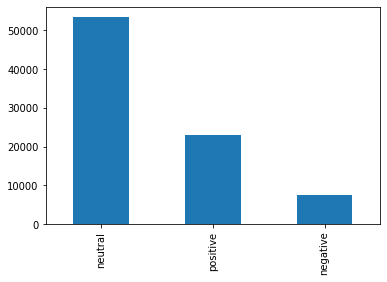

In [33]:
 tweet_df['sentiment'].value_counts().plot(kind='bar')

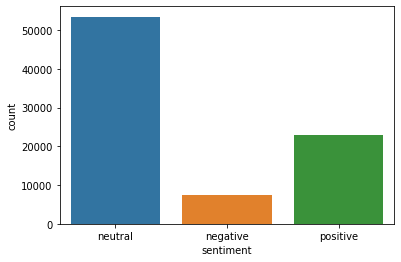

In [34]:
sns.countplot(tweet_df['sentiment'])

In [9]:
tweet_df['polarity'] = tweet_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweet_df['subjectivity'] = tweet_df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
tweet_df.head()

id                   name  \
0  1.400000e+18  SAM Global University   
1  1.400000e+18          VIKAS SAHU 🇮🇳   
2  1.400000e+18           Forbes India   
3  1.400000e+18          Sam Maina 🧩🇰🇪   
4  1.400000e+18      Ajay kumar maurya   

                                         description        created_at  \
0  SAM Global University is in education sector f...  09-06-2021 08:53   
1  #Nation_First !! God is the best part of my li...  09-06-2021 08:48   
2  Bringing you the best conversations on Indian ...  09-06-2021 08:44   
3  #IT and #DigitalSecurity at @pi_africahub.\nhu...  09-06-2021 08:44   
4  HINDU/\nM.A Economics/\nNation first/ सत्यमेव ...  09-06-2021 08:44   

   followers_count  friends_count  favourites_count  verified  \
0              109            117                16     False   
1             1153            754              2480     False   
2          1277488            778              2501      True   
3             2553           2262               232     False   
4               65            200             12209     False   

                                                text               source  \
0        get vaccin covid vaccin centr colleg nurs …      Twitter Web App   
1  rt meet honor chhattisgarhin subject student t...   Twitter for iPhone   
2  yash raj film  aim inocul  technician crew mem...            TweetDeck   
3  rt vaccin kenya budget african state budget ye...      Twitter Web App   
4  rt navig vaccin process easili tip  book slot ...  Twitter for Android   

   retweet_count  retweeted               location  \
0              0      False                 Bhopal   
1              6      False  🇮🇳 Rajim,Chhattisgarh   
2              0      False                  India   
3              1      False         Nairobi, Kenya   
4              1      False   Uttarakhand Rudrapur   

                                   sentiment_results sentiment  polarity  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral  0.000000   
1  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...  negative -0.166667   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral  0.000000   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral  0.000000   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral  0.000000   

   subjectivity  
0      0.000000  
1      0.333333  
2      0.000000  
3      0.000000  
4      0.000000

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

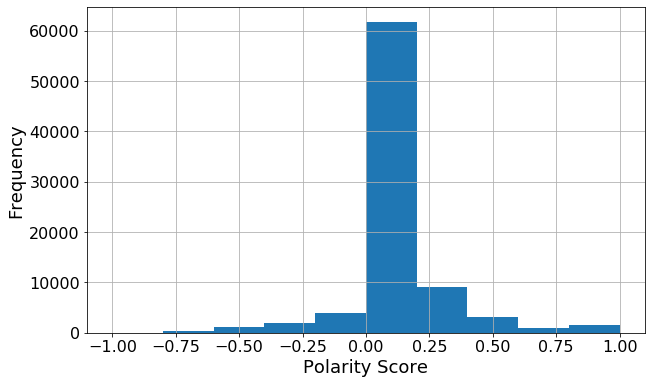

In [36]:
fig = plt.figure(figsize=(10, 6))
tweet_df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text yticklabel objects>)

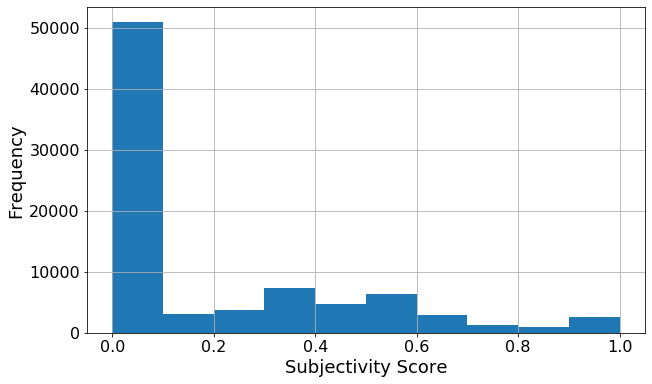

In [37]:
fig = plt.figure(figsize=(10, 6))
tweet_df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Proposed System

Naive Bayes using 80-20 split

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))  
final_vectorized_data = count_vectorizer.fit_transform(tweet_df['text'])  
final_vectorized_data

<83718x259754 sparse matrix of type '<class 'numpy.int64'>'
	with 1237349 stored elements in Compressed Sparse Row format>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, tweet_df['sentiment'],
                                                    test_size=0.2, random_state=69)

In [24]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (66974, 259754)
X_test_shape :  (16744, 259754)
y_train_shape :  (66974,)
y_test_shape :  (16744,)


In [25]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

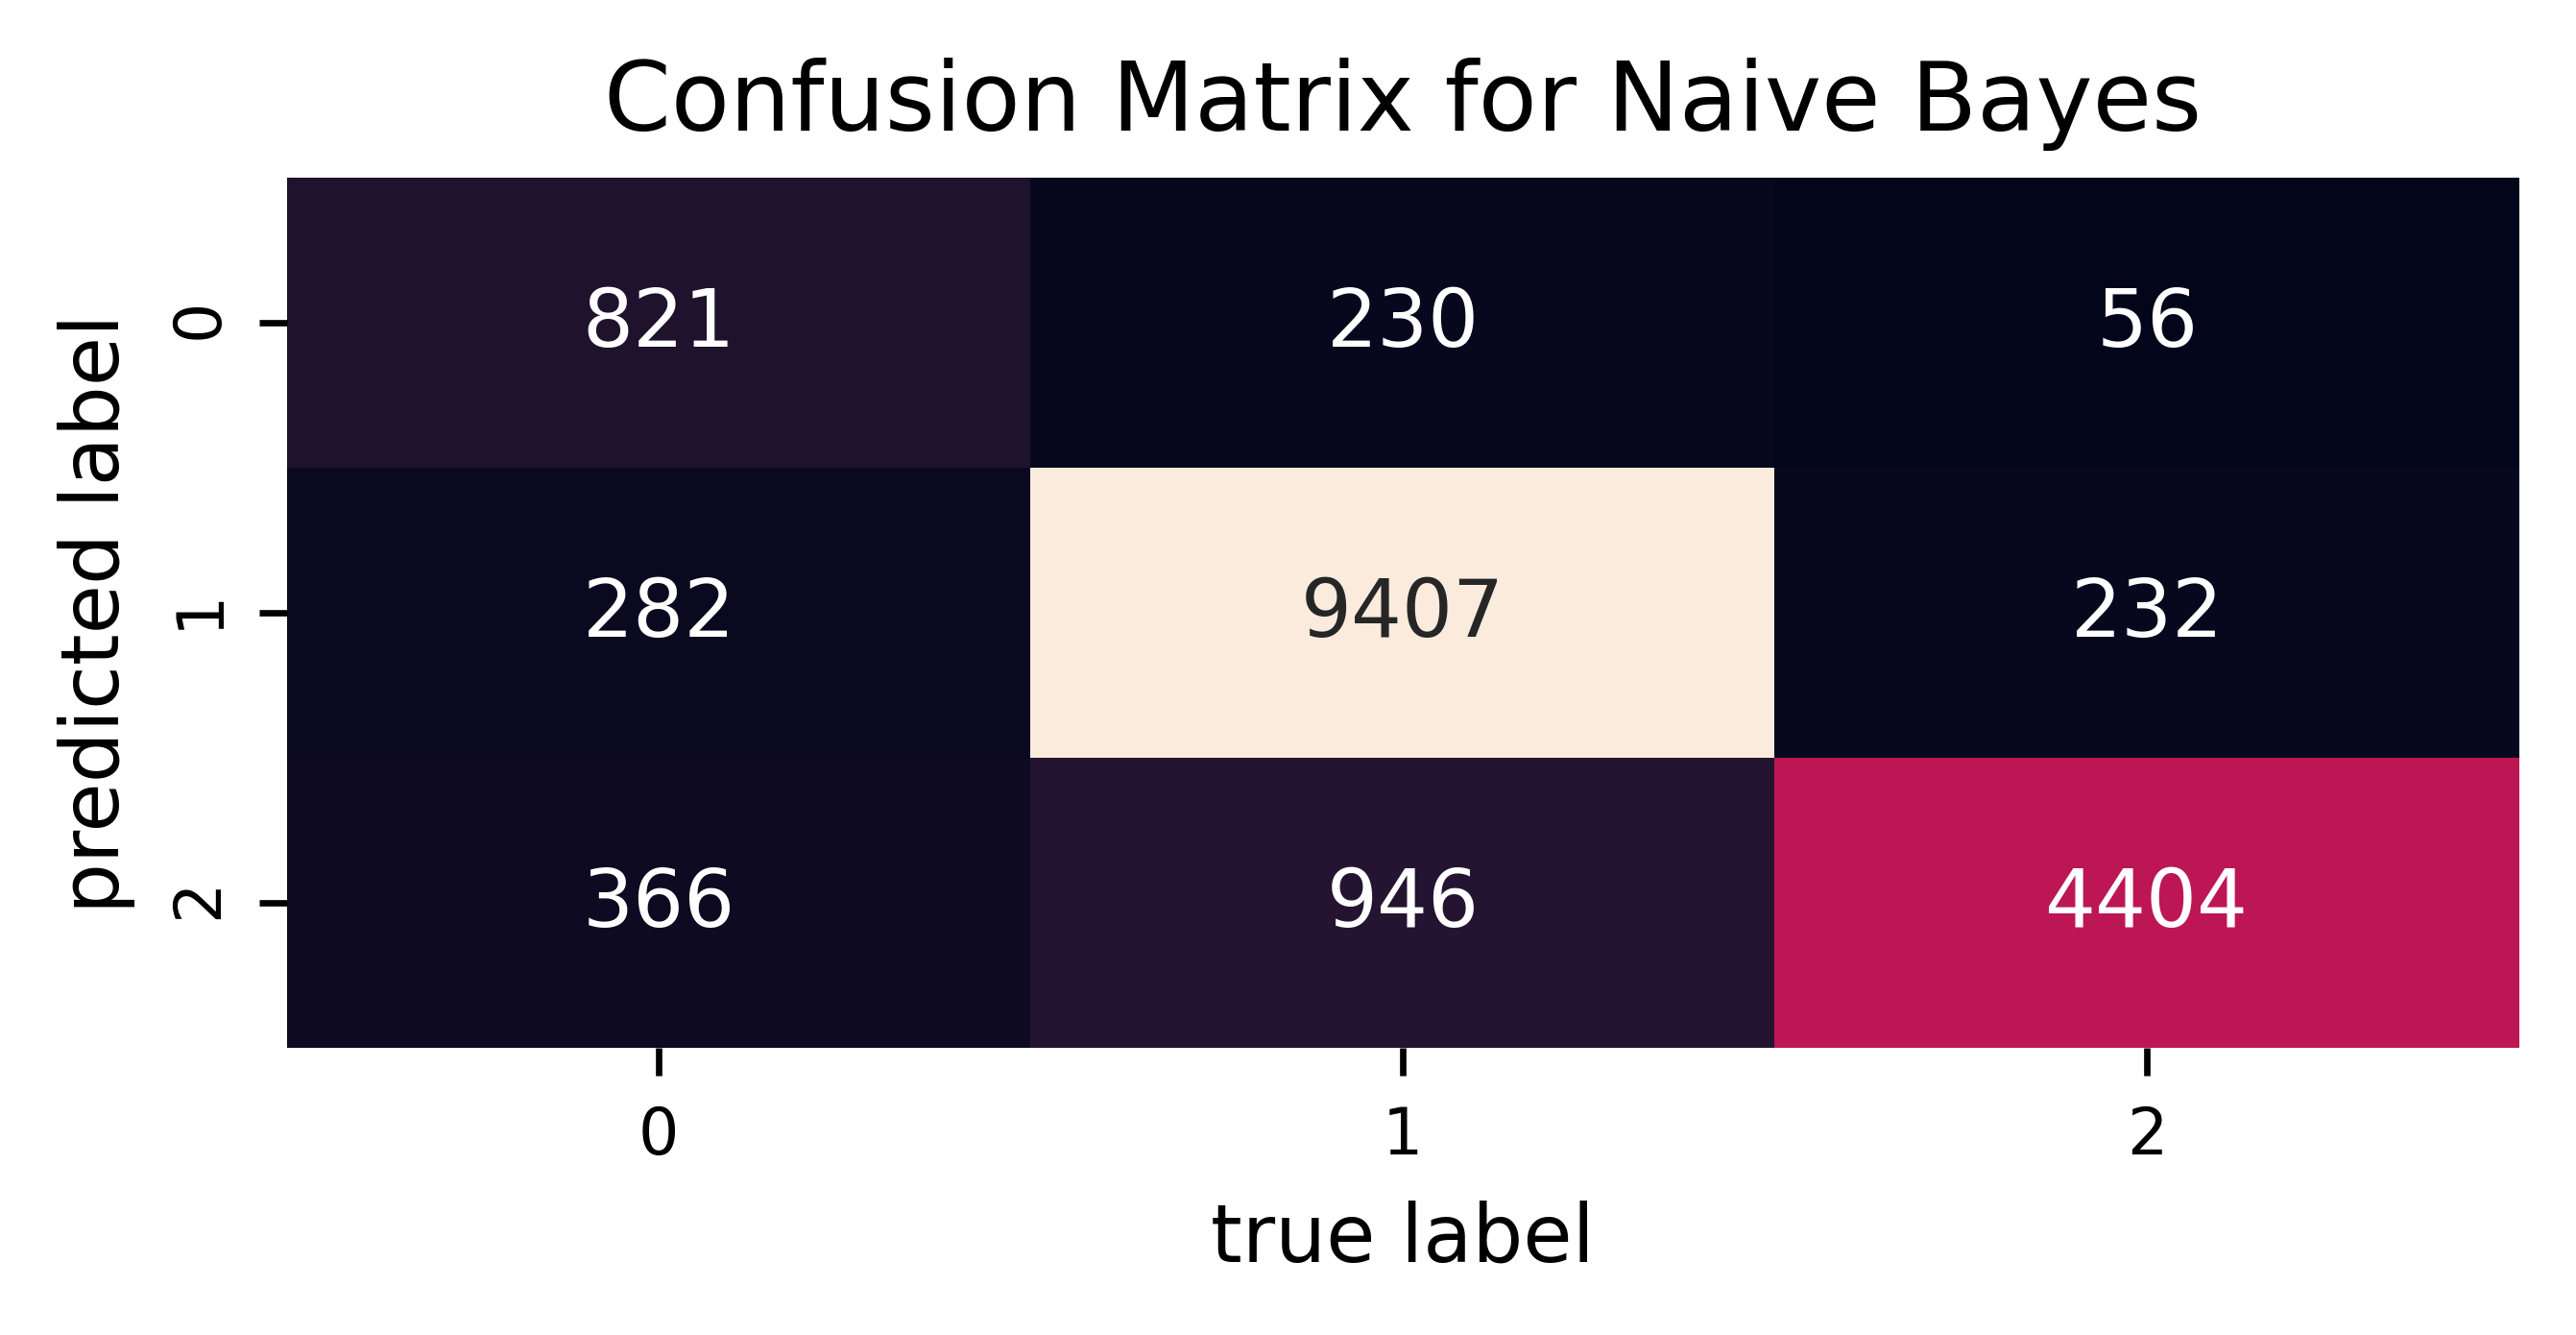

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
f=plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
f.set_figwidth(5)
f.set_figheight(2)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.873865265169613


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

    negative       0.74      0.56      0.64      1469
     neutral       0.95      0.89      0.92     10583
    positive       0.77      0.94      0.85      4692

    accuracy                           0.87     16744
   macro avg       0.82      0.80      0.80     16744
weighted avg       0.88      0.87      0.87     16744



In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

    negative       0.74      0.56      0.64      1469
     neutral       0.95      0.89      0.92     10583
    positive       0.77      0.94      0.85      4692

    accuracy                           0.87     16744
   macro avg       0.82      0.80      0.80     16744
weighted avg       0.88      0.87      0.87     16744



In [18]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(100, 20) (100,)


# Existing Systems

 K-fold Cross Validation

In [19]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.830 (0.119)


K-Nearest Neighbor

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7803392259913999


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.97      0.22      0.35      1469
     neutral       0.75      1.00      0.85     10583
    positive       0.97      0.47      0.63      4692

    accuracy                           0.78     16744
   macro avg       0.90      0.56      0.61     16744
weighted avg       0.83      0.78      0.75     16744



In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8150979455327282


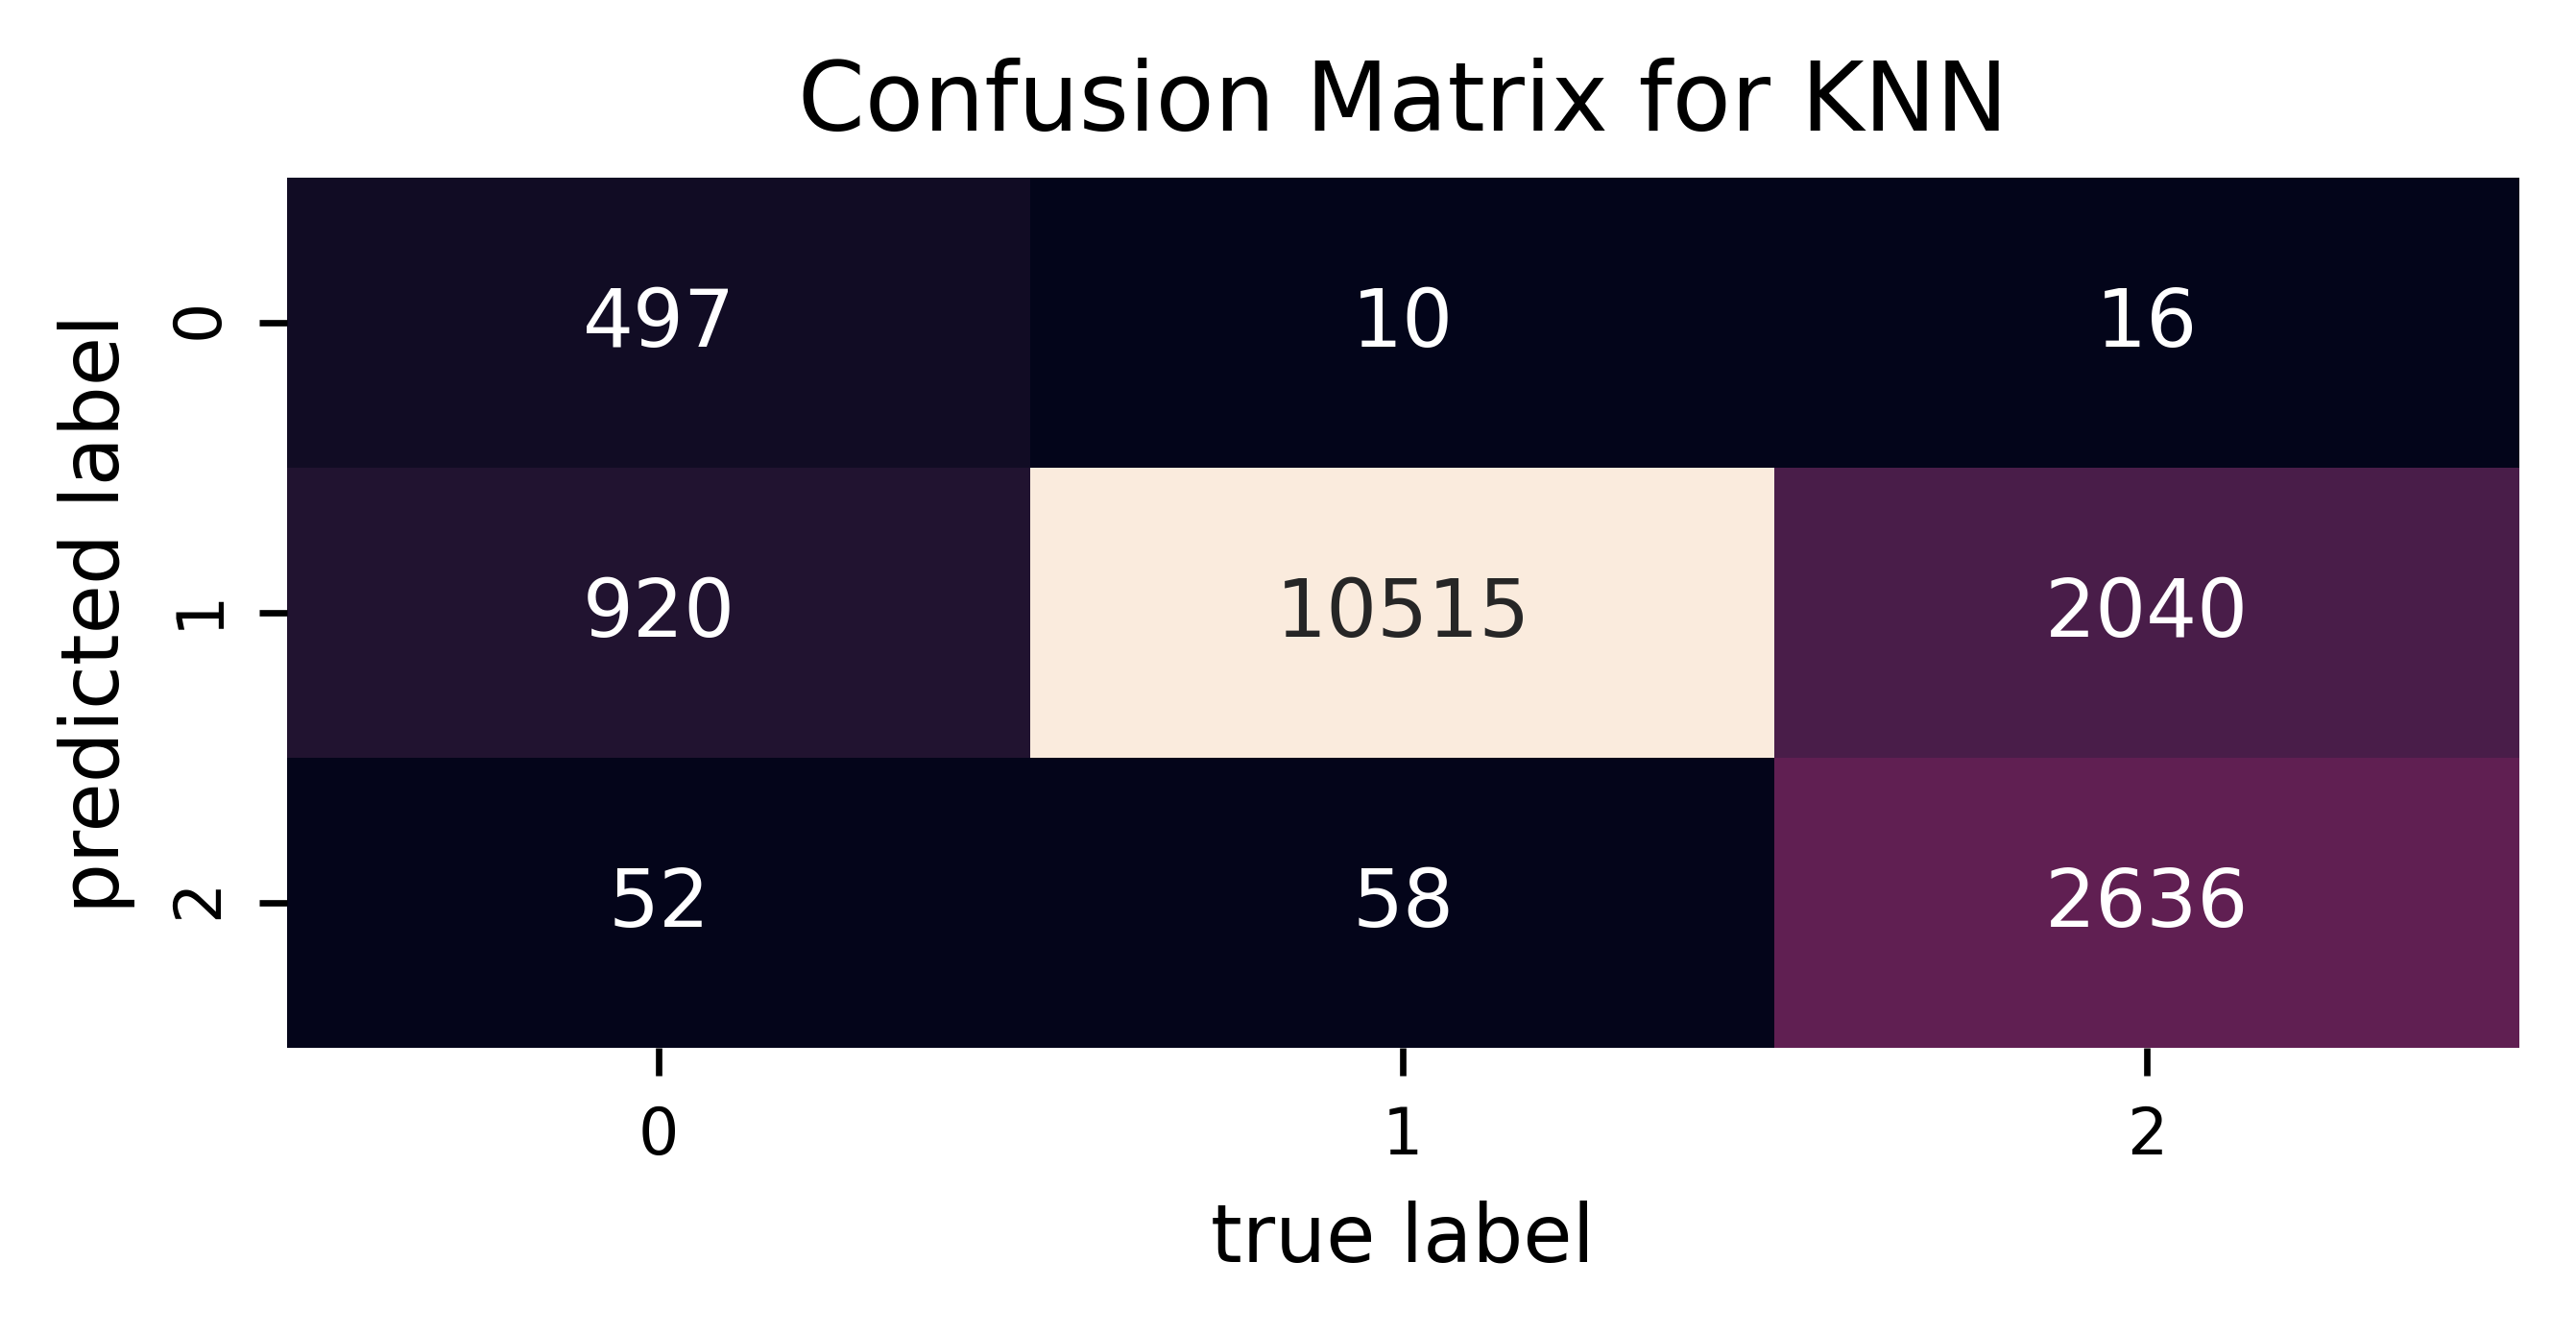

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
f=plt.figure(dpi=600)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for KNN')
plt.xlabel('true label')
plt.ylabel('predicted label')
f.set_figwidth(5)
f.set_figheight(2)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Support Vector Machine(SVM)

In [36]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
acc

0.982202580028667

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.95      0.93      0.94      1469
     neutral       0.99      0.99      0.99     10583
    positive       0.98      0.98      0.98      4692

    accuracy                           0.98     16744
   macro avg       0.97      0.97      0.97     16744
weighted avg       0.98      0.98      0.98     16744



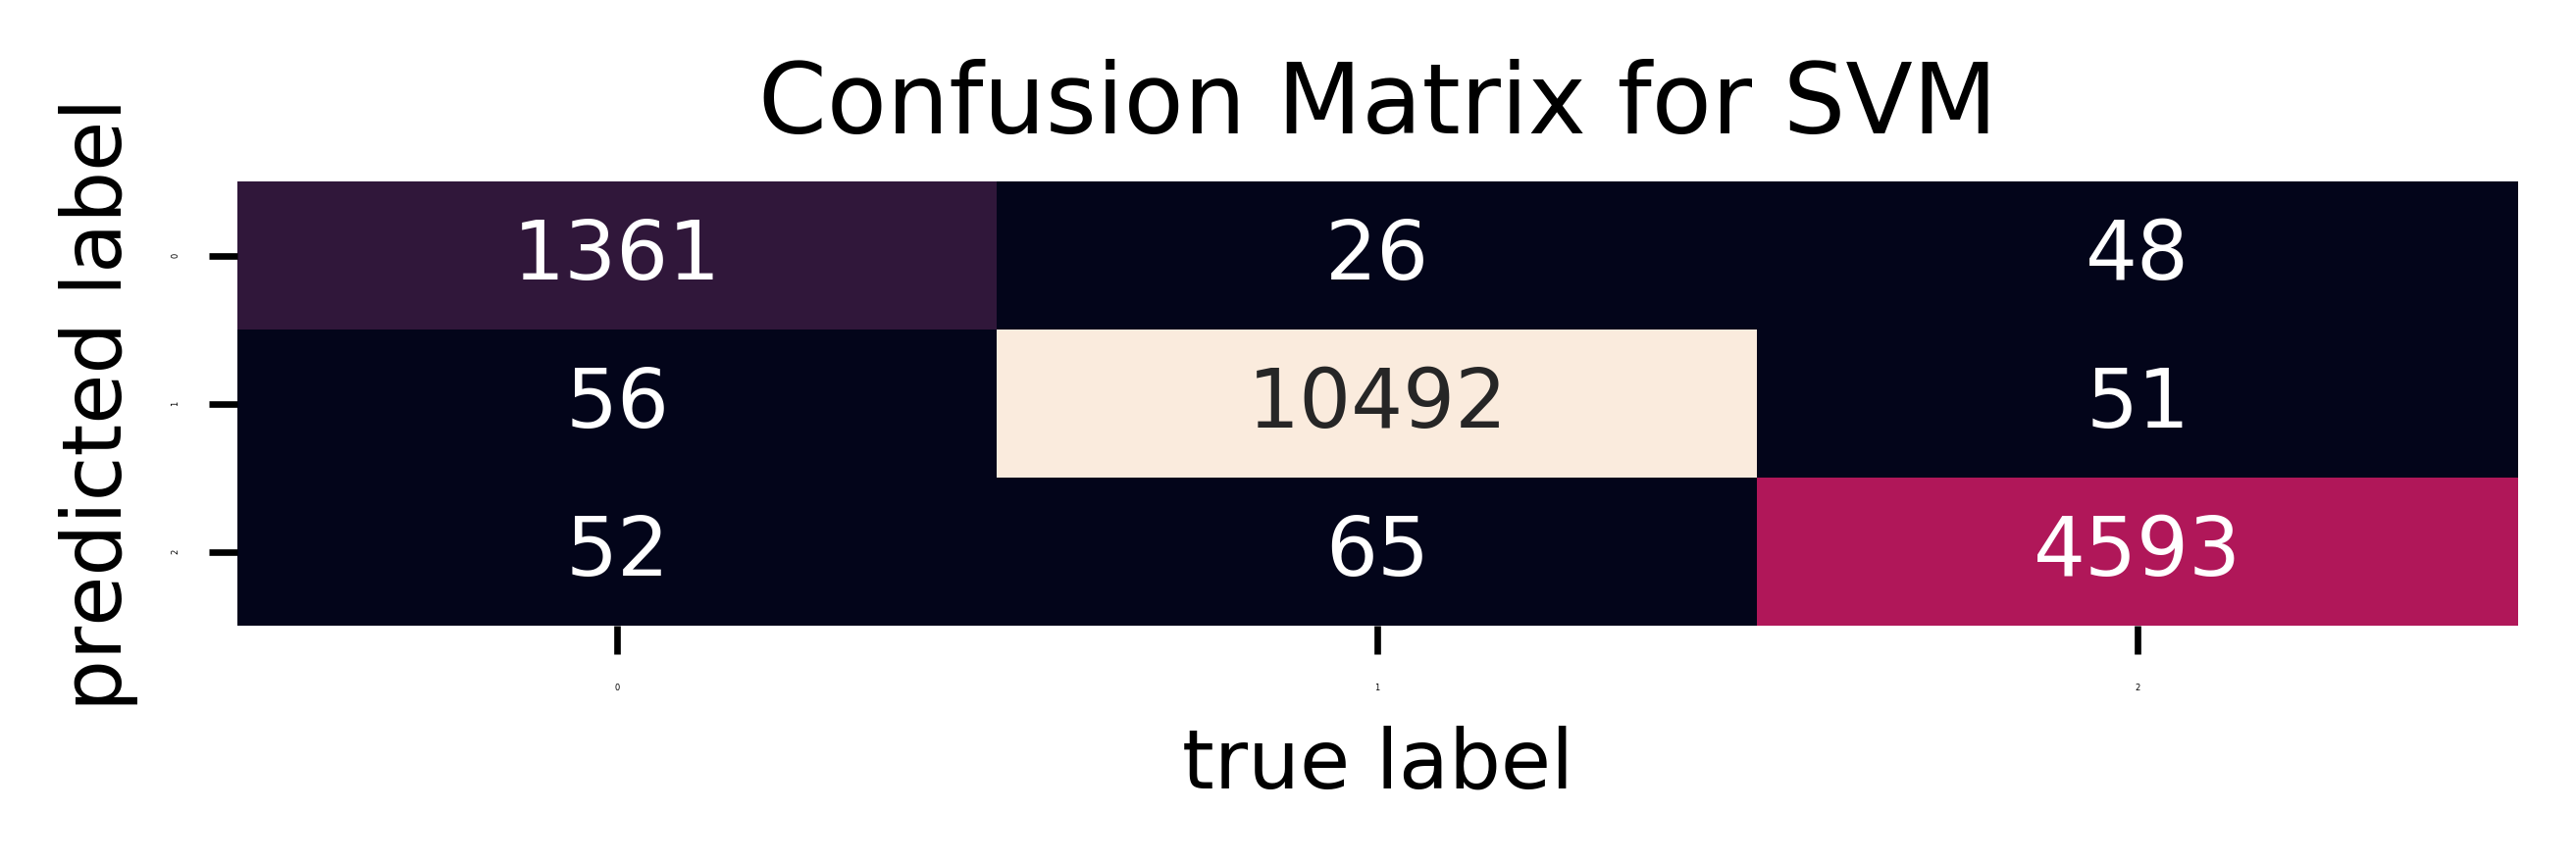

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
f=plt.figure(dpi=600)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('true label')
plt.ylabel('predicted label')
f.set_figwidth(5)
f.set_figheight(1)
plt.xticks(fontsize=1)
plt.yticks(fontsize=1)
plt.show()

Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train,y_train)
y_pred_class = dtc.predict(X_test)
metrics.accuracy_score(y_test,y_pred_class)

0.9820831342570473

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

    negative       0.94      0.93      0.93      1469
     neutral       0.99      0.99      0.99     10583
    positive       0.97      0.98      0.97      4692

    accuracy                           0.98     16744
   macro avg       0.97      0.97      0.97     16744
weighted avg       0.98      0.98      0.98     16744



In [29]:
dtc = DecisionTreeClassifier(min_samples_split = 4,random_state = 0)
dtc.fit(X_train,y_train)
y_pred_class = dtc.predict(X_test)
metrics.accuracy_score(y_test,y_pred_class)

0.9822623029144768

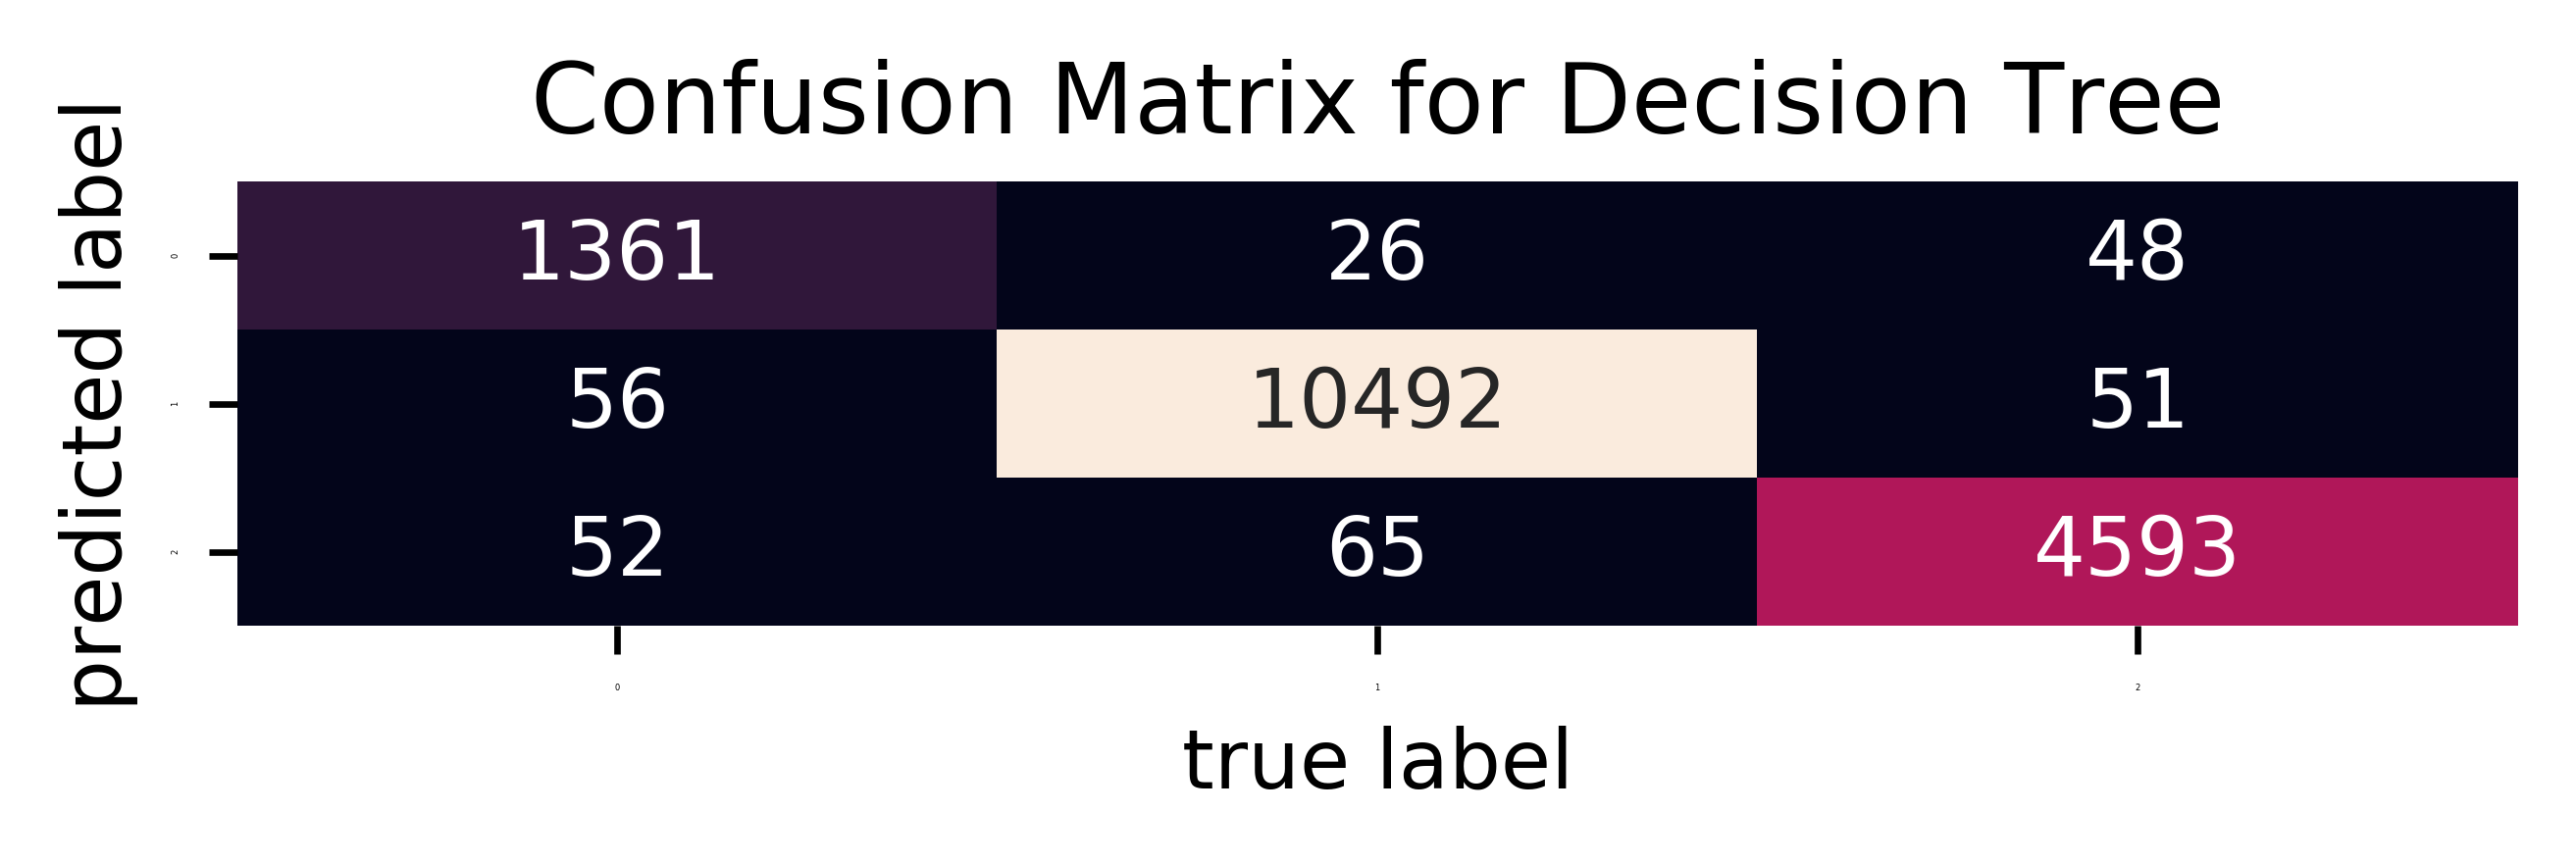

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
f=plt.figure(dpi=600)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('true label')
plt.ylabel('predicted label')
f.set_figwidth(5)
f.set_figheight(1)
plt.xticks(fontsize=1)
plt.yticks(fontsize=1)
plt.show()

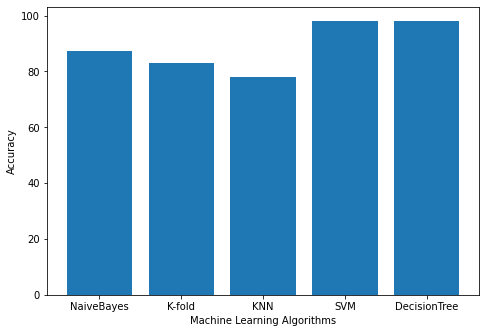

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algs = ['NaiveBayes', 'K-fold', 'KNN', 'SVM', 'DecisionTree']
acc_score = [87.386,83,78.033,98.220,98.208]
ax.set_xlabel('Machine Learning Algorithms')
ax.set_ylabel('Accuracy')
ax.bar(algs,acc_score)
plt.show()

In [39]:
from plotly.offline import plot
from plotly.graph_objs import *
trace1 = {
  "name": "Accuracy", 
  "type": "bar", 
  "x": ["NaiveBayes","KNN", "SVM", "DecisionTree"], 
  "y": [87.386,83,98.220,98.208]
}
trace2 = {
  "name": "Precision", 
  "type": "bar", 
  "x": ["NaiveBayes","KNN", "SVM", "DecisionTree"], 
  "y": [88, 83, 98, 98]
}
trace3 = {
  "name": "Recall", 
  "type": "bar", 
  "x": ["NaiveBayes","KNN", "SVM", "DecisionTree"], 
  "y": [87, 78,98,98]
}
trace4 = {
  "name": "F1 Score", 
  "type": "bar", 
  "x": ["NaiveBayes","KNN", "SVM", "DecisionTree"], 
  "y": [87, 75,98,98]
}
data = Data([trace1, trace2, trace3, trace4])
layout = {"barmode": "group"}
fig = Figure(data=data, layout=layout)
plot_url = plot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [26]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [40]:
properties = list(tweet_df.columns.values)
X, y = make_classification(n_samples=83000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
	keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_data=(X_val, y_val))

Train on 53120 samples, validate on 13280 samples
Epoch 1/10
53120/53120 [==============================] - 218s 4ms/sample - loss: 0.0880 - acc: 0.8808 - val_loss: 0.0687 - val_acc: 0.9108
Epoch 2/10
53120/53120 [==============================] - 205s 4ms/sample - loss: 0.0662 - acc: 0.9138 - val_loss: 0.0603 - val_acc: 0.9215
Epoch 3/10
53120/53120 [==============================] - 211s 4ms/sample - loss: 0.0608 - acc: 0.9203 - val_loss: 0.0590 - val_acc: 0.9229
Epoch 4/10
53120/53120 [==============================] - 204s 4ms/sample - loss: 0.0596 - acc: 0.9213 - val_loss: 0.0577 - val_acc: 0.9242
Epoch 5/10
53120/53120 [==============================] - 211s 4ms/sample - loss: 0.0589 - acc: 0.9217 - val_loss: 0.0565 - val_acc: 0.9260
Epoch 6/10
53120/53120 [==============================] - 205s 4ms/sample - loss: 0.0582 - acc: 0.9223 - val_loss: 0.0541 - val_acc: 0.9289
Epoch 7/10
53120/53120 [==============================] - 203s 4ms/sample - loss: 0.0575 - acc: 0.9240 - val_l

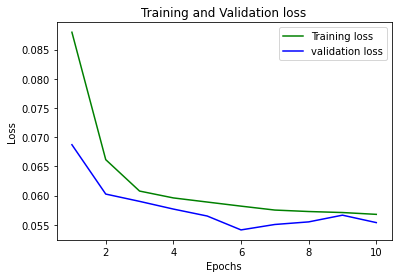

In [47]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

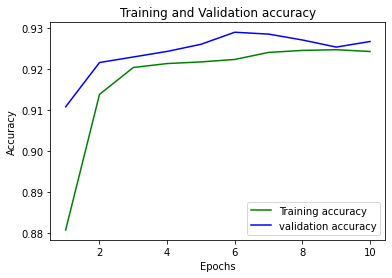

In [48]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

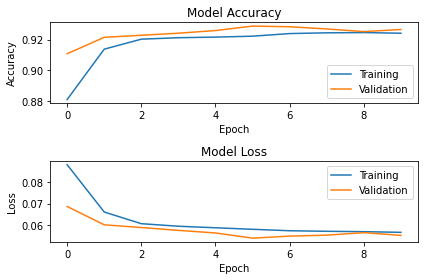

In [45]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam', metrics=["acc"])

 
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

Inspection

In [31]:
positive_tweets=tweet_df[tweet_df['sentiment']=='positive']['text']
negative_tweets=tweet_df[tweet_df['sentiment']=='negative']['text']
neutral_tweets=tweet_df[tweet_df['sentiment']=='neutral']['text']

In [32]:
 neutral_tweets.head(10).tolist()

['get vaccin covid vaccin centr colleg nurs …',
 'yash raj film  aim inocul  technician crew member phase  enabl res…',
 'rt vaccin kenya budget african state budget year  kenya  ke bil…',
 'rt navig vaccin process easili tip  book slot get vaccin  al…',
 'rt  week go still time regist  open webinar vaccin uk  amp  ireland  ethic practic  date…',
 'move facilit vaccin person disabl  govt allow uniqu disabl id …',
 'rt vaccin campaign messag billboard along chitungwiza road 🇿🇼 support',
 ' week go still time regist  open webinar vaccin uk  amp  ireland  ethic practice…',
 'covishield produc antibodi covaxin  find studi  vaccination…',
 'rt move facilit vaccin person disabl  govt allow uniqu disabl id registrat…']

In [33]:
 positive_tweets.head(10).tolist()

['impact pandem children  amp  young peopl enorm  trauma inflict hugew need talk abou…',
 'rt vaccin programm also start institut  today  first half colleagu  want  get vacc…',
 'rt new academ session colleg  amp  univers begin  word yet ugc  govern  check ht…',
 'elig vaccin  get vaccin right away  pandem  pleas  own…',
 'rt  dr edward jenner  administ first record vaccin inocul pu cowpox blister…',
 'rt  vaccin statu  th june     ✅total vaccin dose administ  far negetiveemoji  …',
 'rt fastmov pandem  one safe  unless everyon safe  vaccin one effect to…',
 'rt good morn king  amp  king 👑❤🕯hope keep warm 🔥🧤🧥 bless day  ☕🍵 vaccin ❄🥶…',
 'good morn king  amp  king 👑❤🕯hope keep warm 🔥🧤🧥 bless day  ☕🍵 vaccination…',
 'second dose done  smile hope  govern wave gst includ vaccin  …']

In [34]:
negative_tweets.head(10).tolist()

['rt meet honor chhattisgarhin subject student th class thei…',
 'rt meet honor chhattisgarhin subject student th class thei…',
 'rt meet honor chhattisgarhin subject student th class thei…',
 'rt meet honor chhattisgarhin subject student th class thei…',
 'rt meet honor chhattisgarhin subject student th class thei…',
 'rt meet honor chhattisgarhin subject student th class thei…',
 'meet honor chhattisgarhin subject student th class abo…',
 'maxpric charg privat covid vaccin center per instruct given ministri health  amp  …',
 'rich countri continu vaccin expens poor  end vaccin whe…',
 'the target group current vaccin due second dose  ']

In [35]:
pos_tokens=[token for line in positive_tweets for token in line.split()]
neg_tokens=[token for line in negative_tweets for token in line.split()]
neu_tokens=[token for line in neutral_tweets for token in line.split()]

In [36]:
pos_tokens

['impact',
 'pandem',
 'children',
 'amp',
 'young',
 'peopl',
 'enorm',
 'trauma',
 'inflict',
 'hugew',
 'need',
 'talk',
 'abou…',
 'rt',
 'vaccin',
 'programm',
 'also',
 'start',
 'institut',
 'today',
 'first',
 'half',
 'colleagu',
 'want',
 'get',
 'vacc…',
 'rt',
 'new',
 'academ',
 'session',
 'colleg',
 'amp',
 'univers',
 'begin',
 'word',
 'yet',
 'ugc',
 'govern',
 'check',
 'ht…',
 'elig',
 'vaccin',
 'get',
 'vaccin',
 'right',
 'away',
 'pandem',
 'pleas',
 'own…',
 'rt',
 'dr',
 'edward',
 'jenner',
 'administ',
 'first',
 'record',
 'vaccin',
 'inocul',
 'pu',
 'cowpox',
 'blister…',
 'rt',
 'vaccin',
 'statu',
 'th',
 'june',
 '✅total',
 'vaccin',
 'dose',
 'administ',
 'far',
 'negetiveemoji',
 '…',
 'rt',
 'fastmov',
 'pandem',
 'one',
 'safe',
 'unless',
 'everyon',
 'safe',
 'vaccin',
 'one',
 'effect',
 'to…',
 'rt',
 'good',
 'morn',
 'king',
 'amp',
 'king',
 '👑❤🕯hope',
 'keep',
 'warm',
 '🔥🧤🧥',
 'bless',
 'day',
 '☕🍵',
 'vaccin',
 '❄🥶…',
 'good',
 'morn',
 '

In [37]:
def get_tokens(docx,num=30):
    word_tokens=Counter(docx)
    most_common=word_tokens.most_common(num)
    result=most_common
    return result

In [38]:
get_tokens(neg_tokens)

[('vaccin', 2890),
 ('…', 1880),
 ('’', 923),
 ('russia', 753),
 ('report', 708),
 ('busi', 695),
 ('usual', 694),
 ('everyth', 676),
 ('open', 669),
 ('ontario', 650),
 ('dose', 629),
 ('case', 619),
 ('moscow', 569),
 ('get', 555),
 ('covid', 530),
 ('shot', 507),
 ('amp', 413),
 ('got', 412),
 ('second', 392),
 ('rt', 380),
 ('canada', 377),
 ('peopl', 372),
 ('day', 354),
 ('due', 330),
 ('take', 321),
 ('effect', 317),
 ('embarrass', 300),
 ('base', 287),
 ('of…', 286),
 ('today', 282)]

In [39]:
most_common_pos_words=get_tokens(pos_tokens)
most_common_neg_words=get_tokens(neg_tokens)
most_common_neu_words=get_tokens(neu_tokens)

In [40]:
most_common_neu_words

[('vaccin', 29170),
 ('…', 12273),
 ('dose', 6907),
 ('rt', 6193),
 ('’', 5856),
 ('covid', 5041),
 ('get', 4231),
 ('amp', 2965),
 ('got', 2884),
 ('th', 2787),
 ('today', 2659),
 ('june', 2575),
 ('shot', 2551),
 ('india', 2510),
 ('statu', 2376),
 ('second', 2324),
 ('use', 1881),
 ('approv', 1879),
 ('effect', 1844),
 ('peopl', 1803),
 ('day', 1791),
 ('pm', 1778),
 ('nd', 1750),
 ('receiv', 1699),
 ('administ', 1644),
 ('one', 1608),
 ('go', 1564),
 ('thank', 1553),
 ('st', 1494),
 ('take', 1492)]

In [41]:
# inspect the most negatively charged tweets
tweet_df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  polarity  subjectivity
0  kindli check news god constantli kill evil  se...      -1.0           1.0
1   medic passport  amp  ritual uncleanli evil nato…      -1.0           1.0
2                  agre one worst experiment howev …      -1.0           1.0
3  dear twitter  got shot tuesday  hr afterward p...      -1.0           1.0
4           ramp vaccin product us hit grim mileston      -1.0           1.0
5  agre pandem worst ever death vaccin launch ind...      -1.0           1.0
6  patient beaten  gt  “ worst thing see peopl ar...      -1.0           1.0
7  “ worst chill fever life  ” “ got rash arm  ” ...      -1.0           1.0
8  kick ass today  definit feel lot worst nd goar...      -1.0           1.0
9  maharashtra go worst phase  traitor wont forgi...      -1.0           1.0

In [42]:
# inspect the most positively charged tweets
tweet_df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  polarity  subjectivity
0  today see pappu  push up  come conclusionth be...       1.0           0.3
1          congratul bharat biotech  best vaccin  🇮🇳       1.0           0.3
2  get st shot tomorrow   bit frighten follow  be...       1.0           0.3
3  best word ’ heard year  “ give us minut  vacci...       1.0           0.3
4    unsur vaccin best  answer  twodos  amp  approv…       1.0           0.3
5                multilay mask provid best defens  …       1.0           0.3
6                   best analysi covid vaccines🤦🤦🤦 …       1.0           0.3
7                           ai blockchain meet best        1.0           0.3
8  hit wine shot perfect sixer    choic brand amb...       1.0           1.0
9                             legaci  best advert  👇       1.0           0.3

In [43]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
tweet_df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  polarity  subjectivity
0        get vaccin covid vaccin centr colleg nurs …       0.0           0.0
1                                               team       0.0           0.0
2               day post vaccin check  👍arm  sore af       0.0           0.0
3  us  know know  test booster shot variant  also...       0.0           0.0
4  figur color repres favorit team whilst absorb ...       0.0           0.0
5       known got either vax  sore arm  daughter fi…       0.0           0.0
6            hesit come type vaccin avail if  would…       0.0           0.0
7                    second shot done  thank scienc        0.0           0.0
8                                 park west pharmaci       0.0           0.0
9                                          st shot ✅       0.0           0.0

In [44]:
# inspect the most objective tweets
tweet_df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  polarity  subjectivity
0  st covid vaccin   minut far thing ve felt achi...       0.1           1.0
1  also got vaccin today wait phase data  ideal i...       0.9           1.0
2                               painlessand  far go…       0.1           1.0
3   amp  feel goodvaccin caus understoodther  one...       1.0           1.0
4  get indian made gavi vaccin allianc freethat  ...       0.8           1.0
5    cold chain storag transport vaccin need  maybe…      -0.6           1.0
6                        karnataka troubl far vaccin       0.1           1.0
7   exactli  except corrupt crumbl bumbl disast the…      -0.5           1.0
8      nice get sunshin busi excit day film various…       0.6           1.0
9  got final fauci ouchi yesterday never felt gra...       0.0           1.0

In [45]:
timeline = tweet_df.groupby(['created_at']).agg(np.nanmean).reset_index()
timeline['count'] = tweet_df.groupby(['created_at']).count().reset_index()['retweeted']
timeline = timeline[['created_at', 'count', 'polarity', 'retweeted', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

created_at  count  polarity  retweeted  subjectivity
0      01-01-2009 00:46      1  0.000000        0.0      0.000000
1      01-01-2009 09:13      1  0.000000        0.0      0.000000
2      01-01-2009 15:08      1  0.200000        0.0      0.300000
3      01-01-2009 17:23      4  0.087500        0.0      0.137500
4      01-01-2010 00:34      1  0.000000        0.0      0.000000
...                 ...    ...       ...        ...           ...
41841  31-12-2020 15:55      1  0.100000        0.0      0.200000
41842  31-12-2020 17:57      1  0.062500        0.0      0.500000
41843  31-12-2020 18:37      1  0.285714        0.0      0.535714
41844  31-12-2020 19:25      4  0.000000        0.0      0.000000
41845  31-12-2020 20:30      1  0.000000        0.0      0.000000

[41846 rows x 5 columns]

# Filter By Vaccine

In [46]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'oxford', 'sputnikv','covishield','Janssen']
 
# Function to filter the data to a single vaccine
def filter_by_vaccy(tweet_df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(tweet_df[tweet_df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
    timeline = df_filt.groupby(['created_at']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['created_at']).count().reset_index()['retweeted']
    timeline = timeline[['created_at', 'count', 'polarity', 'retweeted', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt,timeline

In [47]:
Johnson_Johnson_df,Johnson_Johnson_timeline = filter_by_vaccy(tweet_df, ['Janssen'])
Johnson_Johnson_df.sort_values(by='polarity', ascending=True).reset_index(drop=True)

Empty DataFrame
Columns: [id, name, description, created_at, followers_count, friends_count, favourites_count, verified, text, source, retweet_count, retweeted, location, sentiment_results, sentiment, polarity, subjectivity]
Index: []

In [48]:
sinovac_df,sinovac_timeline = filter_by_vaccy(tweet_df, ['sinovac'])
sinovac_df.sort_values(by='polarity', ascending=True).reset_index(drop=True)

id                              name  \
0    1.370000e+18             ASEANHR Media Pte Ltd   
1    1.370000e+18  Neither A Good Guy nor A Bad Guy   
2    1.370000e+18                     Weine's World   
3    1.370000e+18                     ActivistBowen   
4    1.380000e+18   John Smith #GBNews nearly here!   
..            ...                               ...   
322  1.360000e+18                           OpinYon   
323  1.370000e+18                     ActivistBowen   
324  1.370000e+18                      Syafiq Husni   
325  1.370000e+18                Pharmaniaga Berhad   
326  1.380000e+18             👨🏽‍💻In God We Trust🇺🇸   

                                           description        created_at  \
0    https://t.co/qIxjF2xL7L is the leading busines...  18-07-2018 03:25   
1    Big Fan of ManUTD and giving out advice based ...  09-05-2014 04:18   
2    The world according to Weine. \nGod is watchin...  30-01-2016 09:01   
3    person, web writer, dissident, son, brother, f...  08-06-2011 20:17   
4                              Anarchist. Love Europe.  31-01-2009 13:51   
..                                                 ...               ...   
322  OpinYon is the Philippines' leading advocacy p...  10-11-2010 03:37   
323  person, web writer, dissident, son, brother, f...  08-06-2011 20:17   
324  General Surgeon. KKM. 🦋 Entice wisdom, nonchal...  22-09-2009 10:21   
325  Official account of Pharmaniaga Berhad. At Pha...  19-03-2018 02:56   
326  MBA in Finance:I dig financial for living: Fmr...  11-11-2012 01:44   

     followers_count  friends_count  favourites_count  verified  \
0                336           1664                53     False   
1                122            497               879     False   
2                 16             10               113     False   
3               3795           5003              4907     False   
4               1248           1640             32407     False   
..               ...            ...               ...       ...   
322              823            317               107     False   
323             3796           5003              4913     False   
324               35            114              1248     False   
325              516            238               381     False   
326             2723           2504            157656     False   

                                                  text               source  \
0    februari  philippin welcom  dose sinovac vacci...      Twitter Web App   
1    bad news astrazeneca make think twice receiv v...      Twitter Web App   
2    approv coronaviru  seven peopl felt ill receiv...     Twitter for iPad   
3                      know  hong kong  fuck sinovac …      Twitter Web App   
4    st dose chines sinovac vaccin offer ‘ weak ’ p...            TweetDeck   
..                                                 ...                  ...   
322  stay safe side  countri ’ health expert recomm...  Twitter for Android   
323    reinforc xi jinp  amp  latest proteg carri l...      Twitter Web App   
324             want sinovac time magic speak chines 😂   Twitter for iPhone   
325  china ’ ambassador malaysia ouyang yuje said “...   Twitter for iPhone   
326  chile vaccin record clip shot develop china ’ ...   Twitter for iPhone   

     retweet_count  retweeted                      location  \
0                0      False                     Singapore   
1                0      False            Somewhere I belong   
2                0      False  Boston / Singapore / Sapporo   
3                0      False                     Hong Kong   
4                0      False       Cotswolds & SW France.    
..             ...        ...                           ...   
322              1      False                           NaN   
323              0      False                     Hong Kong   
324              0      False               Kuantan, Pahang   
325              1      False            Selangor, Malays

In [49]:
sinopharm_df,sinopharm_timeline = filter_by_vaccy(tweet_df, ['sinopharm'])
sinopharm_df.sort_values(by='polarity', ascending=True).reset_index(drop=True)

id                 name  \
0    1.380000e+18  Caution Integration   
1    1.380000e+18             Xayernnn   
2    1.360000e+18        ActivistBowen   
3    1.360000e+18           Gulf Today   
4    1.370000e+18         The Pakistan   
..            ...                  ...   
258  1.380000e+18           davidscott   
259  1.380000e+18                Mehak   
260  1.370000e+18            Binteazad   
261  1.370000e+18        Biscuit Error   
262  1.380000e+18       Jesmond Saliba   

                                           description        created_at  \
0    Tolerant patriot,young conservative,Antifa hat...  02-04-2017 18:07   
1    How Can I Help?  Social Activist/Volunteer #Fl...  14-03-2012 15:20   
2    person, web writer, dissident, son, brother, f...  08-06-2011 20:17   
3    Keeping you informed on news and opinions from...  10-09-2009 21:42   
4    We cover all latest news of Pakistan from poli...  04-01-2021 09:02   
..                                                 ...               ...   
258                             I'm direct no bullshit  28-12-2007 11:50   
259                         Disappointed single soul 🙃  17-09-2020 20:30   
260                     do this part metters at all???  26-01-2021 07:49   
261  ASHIQ-E-RASOOL❤️\nLACONIC 🤫\nSIYAH MARKHOOR 👤\...  13-12-2020 15:49   
262                                                NaN  18-01-2012 18:32   

     followers_count  friends_count  favourites_count  verified  \
0                 61            224              1043     False   
1                568           1533              2707     False   
2               3795           5003              4891     False   
3              58043             51               683      True   
4               1009            877                90     False   
..               ...            ...               ...       ...   
258               27             26               119     False   
259               23            123              3095     False   
260                8             70               110     False   
261               21             51               297     False   
262             1447           1529              1307     False   

                                                  text               source  \
0    base hungarian judgment  decid sinopharm  sino...      Twitter Web App   
1    receiv st dose sinopharm  let  slow viru toget...  Twitter for Android   
2     like hong kong  sinopharm avail  shit   febru...      Twitter Web App   
3     sinopharm vaccin work use dead viral particl ...      Twitter Web App   
4    pakistan finalis purchas agreement chines firm...   Twitter for iPhone   
..                                                 ...                  ...   
258  enjoy reunion pleas care see cnn report sinoph...  Twitter for Android   
259  abbu got dose sinopharm vaccin alhumdulillah f...  Twitter for Android   
260  nation  stori agenda us  amp  india contain ch...      Twitter Web App   
261  nation  stori agenda us  amp  india contain ch...  Twitter for Android   
262  cde news updat  sinopharm ’ proteinbas covid v...       Hootsuite Inc.   

     retweet_count  retweeted           location  \
0                0      False          Tauteburg   
1                0      False           Maldives   
2                0      False          Hong Kong   
3                0      False       UAE, Sharjah   
4                0      False           Pakistan   
..             ...        ...                ...   
258              0      False                NaN   
259              0      False                NaN   
260              0      False                NaN   
261              1      False  Pentagon Archives   
262              0      False              Malta   

                                     sentiment_results sentiment  polarity  \
0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  negative -0.800000   
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  negati

In [50]:
moderna_df,moderna_timeline = filter_by_vaccy(tweet_df, ['moderna'])
moderna_df.sort_values(by='polarity', ascending=True).reset_index(drop=True)

id                  name  \
0     1.370000e+18            Ben_Bronte   
1     1.370000e+18                Rob❤U2   
2     1.360000e+18                 Cat K   
3     1.380000e+18          Justin_Doyle   
4     1.380000e+18   Hector Contreras ll   
...            ...                   ...   
1853  1.360000e+18         Allison Grant   
1854  1.380000e+18       Hello TiffyBell   
1855  1.370000e+18  Alt Veterans Affairs   
1856  1.370000e+18        Donna Cavanagh   
1857  1.380000e+18        dale woolridge   

                                            description        created_at  \
0          I tweet about politics, sports, and muppets.  30-08-2019 20:35   
1     #U2forU\n@U2 Father of 2 Girls He/Him \n#Ameri...  24-11-2014 05:46   
2     Wife, Mother, Grandmother Defender of equality...  28-02-2012 03:36   
3     I'm an engineer working at the ISS National La...  15-06-2020 01:59   
4                               Evolving at God's pace.  20-02-2011 17:56   
...                                                 ...               ...   
1853  Just your everyday average girl addicted to po...  06-05-2009 07:48   
1854  #Hashtagger Cosplayer YouTuber Obsessed with H...  07-03-2018 01:51   
1855  An Unofficial account. informative & sometimes...  26-01-2017 19:23   
1856  founder https://t.co/96v7oqaOmr & HOPress-Shor...  30-05-2013 14:48   
1857                                                NaN  29-06-2009 20:26   

      followers_count  friends_count  favourites_count  verified  \
0                   7            127              1361     False   
1                 750            813             10568     False   
2                4810           4839             13500     False   
3                  49            151                99     False   
4                 591             48                36     False   
...               ...            ...               ...       ...   
1853               79            543              8452     False   
1854             1407           2152              5807     False   
1855             4931            668             26014     False   
1856             1753           2157              8325     False   
1857               10             45                 6     False   

                                                   text               source  \
0     year  unit state divid two war tribe  phiza mo...   Twitter for iPhone   
1     st shot moderna vaccin   thank believ base log...  Twitter for Android   
2     got nd moderna shot friday   fever  bodi ach  ...  Twitter for Android   
3     expect feel like crap today nd moderna shot  t...      Twitter Web App   
4     got st dose moderna vaccin monday  ’ get sick ...   Twitter for iPhone   
...                                                 ...                  ...   
1853  proud say  mani cowork  fulli vaccin today dol...   Twitter for iPhone   
1854         guess get nd dose moderna today     ’  lol   Twitter for iPhone   
1855            proud owner moderna covid vaccin  dose    Twitter for iPhone   
1856  anoth great cartoon  need worri  got moderna s...      Twitter Web App   
1857                            moderna babi  mrna win   Twitter for Android   

      retweet_count  retweeted               location  \
0                 0      False                    NaN   
1                 0      False                Seattle   
2                 0      False  The Great Lakes state   
3                 1      False            Houston, TX   
4                 0      False        Los Angeles, CA   
...             ...        ...                    ...   
1853              0      False        Alberta, Canada   
1854              0      False           Dayton, Ohio   
1855              0      False          United States   
1856              2      False       Philadelphia, PA   
1857              1      False                    NaN   

                                      sentiment_results sentiment  polarity  \
0     {'neg': 0.471,

In [51]:
sputnikv_df,sputnikv_timeline = filter_by_vaccy(tweet_df, ['sputnikv'])
sputnikv_df.sort_values(by='polarity', ascending=True).reset_index(drop=True)

id                                            name  \
0   1.380000e+18                                     Ashok Singh   
1   1.350000e+18                                    Olsi Jazexhi   
2   1.380000e+18                         Uɱҽɾ Fαɾσσϙ “Stay Home”   
3   1.380000e+18                                     Raj Meister   
4   1.380000e+18                                     Ashwin Gour   
5   1.380000e+18                                        Duovocal   
6   1.370000e+18                               Best Health 4 You   
7   1.380000e+18                                Alexander Wahome   
8   1.370000e+18                                         Sputnik   
9   1.380000e+18                               theluminoushannan   
10  1.370000e+18                           Bring 🇨🇦 Troops Home!   
11  1.360000e+18                               Alice St⭕️llmeyer   
12  1.360000e+18                                    William Owen   
13  1.360000e+18                                    William Owen   
14  1.360000e+18                             Vladimir Signorelli   
15  1.370000e+18                               Best Health 4 You   
16  1.380000e+18  Sanjeeb Kumar Sahoo, passionate for journalism   
17  1.380000e+18                                   altproduction   
18  1.380000e+18                                          Balaji   
19  1.380000e+18                                Abdirahim Hajir®   
20  1.380000e+18                                   MemeTheMarket   
21  1.370000e+18                                        Off Sync   
22  1.380000e+18                                        DTSF2015   
23  1.380000e+18                                     Rohit Kumar   

                                          description        created_at  \
0   Politically incorrect,After #Mission272 #Modi2...  20-03-2011 11:53   
1   Dr. Olsi Jazexhi is an Albanian historian, spe...  24-09-2019 10:08   
2   Multimedia Journalist @etribune, formerly Expr...  16-12-2011 17:50   
3   Raj Meister is about Alternative Media, where ...  29-06-2010 10:06   
4   A litigator !\nThe biggest power is not wantin...  14-01-2020 13:18   
5   Effortless language learning combining flashca...  14-01-2021 11:30   
6   Promoting healthy, natural supplements and mor...  06-07-2013 19:54   
7   Social Media Strategist with 7 years experienc...  16-09-2012 05:54   
8   Sputnik is a global wire, radio and digital ne...  22-04-2009 12:55   
9   23 • Muslim • Taurus • MCFC for Life • Ex-Cath...  23-11-2013 04:57   
10                   🇨🇦doesn't need to be in 🇮🇱 Wars!  28-12-2013 13:09   
11  Executive Director @DefendDemocracy. Busy to #...  03-07-2010 16:54   
12  | political | cats | bikes | civil rights | te...  16-03-2009 03:03   
13  | political | cats | bikes | civil rights | te...  16-03-2009 03:03   
14  Founder of Bretton Woods Research https://t.co...  21-05-2009 18:12   
15  Promoting healthy, natural supplements and mor...  06-07-2013 19:54   
16  Editor of @PoliticalMirro @NPM_Magazine , @The...  18-10-2010 06:05   
17                    #cryptoartist #NFT #artist #art  20-03-2021 07:28   
18    Classical Liberal. Wry wit, that usually fails.  07-08-2008 17:03   
19  || Senior Accountant || Entrepreneur || Kenyan...  25-09-2020 07:58   
20  hello everybody i'm new to this. \nis sarcasm ...  18-03-2021 13:19   
21  A scientist is not a person who gives the righ...  06-09-2020 22:01   
22             Interpretor of Song & Player of pianos  07-08-2010 20:10   
23  Inclined towards innovations and ideas, though...  03-03-2011 11:10   

    followers_count  friends_count  favourites_count  verified  \
0             10735           2497             45982     False   
1              2083           1087              1521     False   
2              1217           1213             17159     False   
3              1384            271              3019     False   
4              1946           2220            108879     False   
5                 3             53       

In [52]:
covaxin_df, covaxin_timeline = filter_by_vaccy(tweet_df, ['covaxin'])
covaxin_df.sort_values(by='polarity', ascending=True).reset_index(drop=True)

id              name  \
0     1.380000e+18         NewsMeter   
1     1.370000e+18         NewsMeter   
2     1.370000e+18    Chandra Sekhar   
3     1.370000e+18         NewsMeter   
4     1.370000e+18  Deccan Chronicle   
...            ...               ...   
1023  1.360000e+18     Keith E Smith   
1024  1.380000e+18             vicky   
1025  1.370000e+18      Joey Tavares   
1026  1.370000e+18          The Stud   
1027  1.380000e+18      Kalyan Maity   

                                            description        created_at  \
0     NewsMeter, an Independent digital media platfo...  25-07-2019 11:10   
1     NewsMeter, an Independent digital media platfo...  25-07-2019 11:10   
2     patriotic scoundrel, bust lies of prestitutes,...  07-01-2013 17:30   
3     NewsMeter, an Independent digital media platfo...  25-07-2019 11:10   
4     Deccan Chronicle brings you news and views fro...  26-01-2009 04:16   
...                                                 ...               ...   
1023                                                NaN  08-07-2016 19:44   
1024  'Time Capsule.' 'I now also tweet about my INT...  08-07-2010 20:32   
1025  I’m an ex-paparazzi photographer, a husband, a...  15-02-2009 07:15   
1026  Software developer, fitness, amateur cook & ga...  29-05-2017 16:20   
1027                                   I love my India.  01-05-2017 08:10   

      followers_count  friends_count  favourites_count  verified  \
0                5802             21               300      True   
1                5440             25               295     False   
2                 111             25              6183     False   
3                5464             26               297     False   
4               92864            197              1509      True   
...               ...            ...               ...       ...   
1023               53            132              1549     False   
1024             2311            131             29517     False   
1025               18             63               198     False   
1026               64             56              5200     False   
1027                5            109              1809     False   

                                                   text  \
0     hyd base bharat biotech produc million dose co...   
1     hyd base csiriict develop synthesi agonist mol...   
2     ji taken bbv  also known covaxin  inactiv viru...   
3     hyd base bharat biotech  covid vaccin covaxin ...   
4     covaxin develop bharat biotech icmr shown  eff...   
...                                                 ...   
1023    fda approv like come soon  covaxin best   ocgn    
1024   madeinindia  vaccin best vaccin  develop cova...   
1025  disagre best vaccin one arm comment  need cova...   
1026  although expert  whatev research  covaxin use ...   
1027                    covaxin best world  india best    

                      source  retweet_count  retweeted             location  \
0     Hocalwire Social Share              4      False                  NaN   
1     Hocalwire Social Share              2      False                  NaN   
2            Twitter Web App              0      False                  NaN   
3     Hocalwire Social Share              0      False                  NaN   
4                  TweetDeck              0      False     Hyderabad, India   
...                      ...            ...        ...                  ...   
1023     Twitter for Android              3      False           Monroe, MI   
1024     Twitter for Android              1      False  Bengal Tiger, India   
1025      Twitter for iPhone              1      False     Toronto, Ontario   
1026         Twitter Web App              1      False          Pune, India   
1027     Twitter for Android              1      False                India   

                                      sentiment_results sentiment  polarity  \
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound... 

In [53]:
covishield_df, covishield_timeline = filter_by_vaccy(tweet_df, ['covishield'])
covishield_df.sort_values(by='polarity', ascending=True).reset_index(drop=True)

id                                   name  \
0    1.380000e+18                         rAvirAj DarIsi   
1    1.370000e+18                                   K.T.   
2    1.400000e+18                       Karthik Gaitonde   
3    1.380000e+18                        Diplomatic Guru   
4    1.370000e+18                                 Skylar   
..            ...                                    ...   
215  1.400000e+18  Saran Social Worker & Gst Consultants   
216  1.400000e+18                           Nilesh Deore   
217  1.400000e+18                       Nitesh Raj Bittu   
218  1.400000e+18  Saran Social Worker & Gst Consultants   
219  1.380000e+18                         MeetingOfMinds   

                                           description        created_at  \
0                                                  NaN  12-06-2009 14:26   
1                                              🇲🇺 ✈️🇺🇲  08-02-2017 18:58   
2    History always retweets itself\n\nhttps://t.co...  08-06-2021 05:54   
3    Founder of https://t.co/i2PFCPwwQB\nBlogger on...  09-12-2014 05:22   
4                             Politically unstable ...  21-12-2019 21:05   
..                                                 ...               ...   
215  Saran Social Worker (Gst Consultant, Tds,Tcs, ...  09-06-2021 04:52   
216  |MBBS, MPP| |#IAS Officer, 2011 Batch|\n|Bihar...  09-06-2021 03:23   
217  The meaning of our life is to find our gift. T...  11-06-2021 05:52   
218  Saran Social Worker (Gst Consultant, Tds,Tcs, ...  09-06-2021 04:52   
219                              Words are meaningless  26-10-2011 04:12   

     followers_count  friends_count  favourites_count  verified  \
0                 56            619              1515     False   
1                105            248               282     False   
2                 38            120               674     False   
3                693           1176              1148     False   
4                 83            856              3450     False   
..               ...            ...               ...       ...   
215              831           5004              3028     False   
216            65682            745             11895      True   
217               86            711               315     False   
218              830           5004              3029     False   
219              133            558              1603     False   

                                                  text               source  \
0                     hell covishield  one bad          Twitter for Android   
1    india take export hurdl vaccin raw materi us p...  Twitter for Android   
2    gujarat  vaccin dead man    st dose covishield...      Twitter Web App   
3    american european nation ban critic raw materi...  Twitter for Android   
4    per covishield bare   effect other   activ pro...  Twitter for Android   
..                                                 ...                  ...   
215  rt stay safe take ur vaccin ur turn 🤗 stdoseof...      Twitter Web App   
216  rt stay safe take ur vaccin ur turn 🤗 stdoseof...  Twitter for Android   
217  stay safe take ur vaccin ur turn 🤗 stdoseofcov...  Twitter for Android   
218  rt stay safe take ur vaccin ur turn 🤗 stdoseof...      Twitter Web App   
219  news good seem mumbai covishield use   select ...      Twitter Web App   

     retweet_count  retweeted        location  \
0                0      False      Bangalore    
1                0      False    Indiana, USA   
2                0      False   Mumbai, India   
3                0      False  Bhiwadi, India   
4                1      False           India   
..             ...        ...             ...   
215              2      False    Chapra Bihar   
216              2      False  Chhapra, India   
217              3      False         chapra    
218              2      False    Chapra Bihar   
219              0      False             NaN   

                                     s

In [54]:
pfizer_df, pfizer_timeline = filter_by_vaccy(tweet_df, ['pfizer'])
pfizer_df.sort_values(by='polarity', ascending=True).reset_index(drop=True)

id                     name  \
0     1.340000e+18                      Tom   
1     1.370000e+18     Elizabeth Swaney OLY   
2     1.380000e+18        Frankie McCrankie   
3     1.370000e+18          Massi Feet4Cash   
4     1.360000e+18                     Esta   
...            ...                      ...   
1015  1.350000e+18     Jignesh A. Patel, MD   
1016  1.380000e+18  North Texas Progressive   
1017  1.370000e+18                      Raj   
1018  1.380000e+18                    Tuula   
1019  1.350000e+18        (((Pat O'Leary)))   

                                            description        created_at  \
0     Professional.\n\nInvest to make retirement com...  27-09-2018 22:33   
1     2018 Ski Winter Olympian. American Ninja Warri...  20-11-2011 23:12   
2     Photographer, Artist, Actor, curmudgeon. A big...  07-03-2009 00:21   
3     Owner of Feet4Cash - Proudly producing #footfe...  16-01-2009 08:53   
4     Esta Media Network is an independent and free ...  06-11-2019 15:52   
...                                                 ...               ...   
1015  Persist to prevail. Father, husband and a drea...  17-01-2019 08:12   
1016  Supporting progressive and independent news in...  04-09-2008 15:18   
1017                                            Student  25-09-2020 07:45   
1018  The health & beauty of our planet, music, scie...  15-07-2012 11:36   
1019  Waste no more time arguing what a good man sho...  11-03-2007 17:09   

      followers_count  friends_count  favourites_count  verified  \
0                  61            186               699     False   
1                2692           1087               564     False   
2                 192            542              2506     False   
3                1286            213              2101     False   
4                 844            115                 3     False   
...               ...            ...               ...       ...   
1015             4823            234               835     False   
1016             2921           2180             12624     False   
1017                2             17               197     False   
1018             2361           3497             18873     False   
1019              205            121             16974     False   

                                                   text               source  \
0     pfizer dose  inform consent  base clinic trial...      Twitter Web App   
1     grate receiv st dose pfizerbiontech covid vacc...            Instagram   
2                                      posh pfizer crap  Twitter for Android   
3      sick tire  pfizer  astrazeneca  meme  let  co...      Twitter Web App   
4     covid sick drop   pfizer shot  isra health min...   Twitter for iPhone   
...                                                 ...                  ...   
1015  mix feel joy  relief  amp  anxieti  receiv nd ...  Twitter for Android   
1016  great  rap war vaccin tshirt  got pfizer activ...            TweetDeck   
1017         lol pfizer bu even approv clearli written   Twitter for Android   
1018  best vaccin  pfizer becam statu vaxth “ double...     Twitter for iPad   
1019   hope ll offer pfizerbiontech vaccin  seem bes...  Twitter for Android   

      retweet_count  retweeted              location  \
0                 0      False        United Kingdom   
1                 0      False            California   
2                 0      False        United Kingdom   
3                 0      False                 Italy   
4                 0      False                   NaN   
...             ...        ...                   ...   
1015              0      False          Brooklyn, NY   
1016              6      False            Dallas, TX   
1017              1      False                   NaN   
1018              0      False             Metro NY    
1019              0      False  The Barony of Idrone   

                                      sentiment_results sentiment  polarity

In [55]:
oxford_df, oxford_timeline = filter_by_vaccy(tweet_df, ['oxford'])
oxford_df.sort_values(by='polarity', ascending=True).reset_index(drop=True)

id                       name  \
0    1.380000e+18  The Great Wealth Transfer   
1    1.380000e+18                 🌎 Sarwar 🌐   
2    1.380000e+18                      owhy3   
3    1.380000e+18                  lisa jane   
4    1.370000e+18                       Jeff   
..            ...                        ...   
432  1.370000e+18            Pauline Gibbons   
433  1.370000e+18                       Ade🌐   
434  1.340000e+18            Deepa Choudhury   
435  1.370000e+18            Dave Whitehouse   
436  1.370000e+18                Tom Hartley   

                                           description        created_at  \
0    Wealth Transfers are available regularly in th...  19-04-2020 19:00   
1                                       W pirsarwarras  01-07-2009 00:18   
2    ..The Light shines in Darkness, \nthe darkness...  30-12-2013 23:23   
3                                                  NaN  30-08-2012 17:49   
4                                              Do Good  14-09-2018 21:02   
..                                                 ...               ...   
432                                                NaN  12-07-2015 22:02   
433  Live Events🎭-Production Manager🔩-Technical Man...  27-05-2009 21:43   
434  I am a portfolio Family physician with special...  03-07-2019 15:01   
435                                                NaN  01-08-2015 17:45   
436   Britain’s Deputy High Commissioner to Ghana 🇬🇧🇬🇭  25-07-2016 10:04   

     followers_count  friends_count  favourites_count  verified  \
0               1389            912              9695     False   
1               2043           1731              7040     False   
2               2391           2434              9623     False   
3                712           1844              6981     False   
4                  2             30              1205     False   
..               ...            ...               ...       ...   
432               26             48               560     False   
433              268           1093              4389     False   
434               83            225               390     False   
435             1421           2691              3233     False   
436             3698           1892             10728      True   

                                                  text               source  \
0    night oxford vaccin worst yet woke multipl tim...  Twitter for Android   
1    oxford univers publish import studi base vacci...      Twitter Web App   
2    the oxford vaccin base viru ’ genet instruct b...      Twitter Web App   
3    peopl bad side effect oxford vaccin pleas inte...   Twitter for iPhone   
4                             bad news oxford mention   Twitter for Android   
..                                                 ...                  ...   
432  husband vaccin today oxford vaccin  daughter w...   Twitter for iPhone   
433  st oxford astrazeneca vaccin jab coupl day ago...   Twitter for iPhone   
434  apart great news oxford astra zeneca vaccin ap...   Twitter for iPhone   
435    jab  ’ proud ’ say oxford 🇬🇧 🇬🇧 🇬🇧 🇬🇧 🇬🇧 🇬🇧 🇬🇧    Twitter for iPhone   
436  brilliant littl video oxford uni covid vaccin ...   Twitter for iPhone   

     retweet_count  retweeted                        location  \
0                1      False                         Global    
1                0      False                               E   
2                1      False   France 29y  -US 21y-  JPN 27y   
3                0      False                 London, England   
4                0      False                  United Kingdom   
..             ...        ...                             ...   
432              0      False                             NaN   
433              0      False        The Windy Kent Coast, UK   
434              0      False         England, United Kingdom   
435              0      False                             NaN   
436              2      False                           

In [56]:
ox_c=0
for i in oxford_df['sentiment']:
    if i=='positive' or i=='neutral':
        ox_c=ox_c+1

cvx_c=0
for i in covaxin_df['sentiment']:
    if i=='positive' or i=='neutral':
        cvx_c=cvx_c+1

sph_c=0
for i in sinopharm_df['sentiment']:
    if i=='positive' or i=='neutral':
        sph_c=sph_c+1

snv_c=0
for i in sinovac_df['sentiment']:
    if i=='positive' or i=='neutral':
        snv_c=snv_c+1

mod_c=0
for i in moderna_df['sentiment']:
    if i=='positive' or i=='neutral':
        mod_c=mod_c+1

pfi_c=0
for i in pfizer_df['sentiment']:
    if i=='positive' or i=='neutral':
        pfi_c=pfi_c+1

joh_c=0
for i in Johnson_Johnson_df['sentiment']:
    if i=='positive' or i=='neutral':
        joh_c=joh_c+1


sp_c=0
for i in sputnikv_df['sentiment']:
    if i=='positive' or i=='neutral':
        sp_c=sp_c+1

cosh_c=0
for i in covishield_df['sentiment']:
    if i=='positive' or i=='neutral':
        cosh_c=cosh_c+1

In [57]:
d={'Covaxin Vaccine':cvx_c,'Sinopharm Vaccine':sph_c,'Sinovac Vaccine':snv_c,'Moderna Vaccine':mod_c,'Pfizer Vaccine':pfi_c,'Oxford Vaccine':ox_c,'Janssen Vaccine':joh_c,'SputnikV Vaccine':sp_c,'Covishield Vaccine':cosh_c}
print(d)
best_vaccine=max(d, key=d.get)
#print("The vaccine, which is best in current situation is:",end='')
#print(best_vaccine)
file1 = open("result.txt","w")
file1.write(best_vaccine)
file1.close()

{'Covaxin Vaccine': 959, 'Sinopharm Vaccine': 251, 'Sinovac Vaccine': 304, 'Moderna Vaccine': 1706, 'Pfizer Vaccine': 940, 'Oxford Vaccine': 394, 'Janssen Vaccine': 0, 'SputnikV Vaccine': 23, 'Covishield Vaccine': 215}


In [58]:
d1 = {'Vaccine_Name':['Covaxin', 'Sinopharm', 'Sinovac','Moderna','Pfizer','Oxford','Jannsen','SputnikV','Covishield'],
         'Sentiment_Count':[cvx_c, sph_c, snv_c,mod_c,pfi_c,ox_c,joh_c,sp_c,cosh_c]}
for each_row in zip(*([i] + (j) 
                      for i, j in d1.items())):
      
                          print(*each_row, "   ",sep='  \t')

Vaccine_Name  	Sentiment_Count  	   
Covaxin  	959  	   
Sinopharm  	251  	   
Sinovac  	304  	   
Moderna  	1706  	   
Pfizer  	940  	   
Oxford  	394  	   
Jannsen  	0  	   
SputnikV  	23  	   
Covishield  	215  	   


WordClouds

In [59]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRASANTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRASANTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

Advanced

In [61]:
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 
 
def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 
 
def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)"

In [62]:
def generate_word_clouds(neg_tokens, neu_tokens, pos_tokens):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_tokens))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func,random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")
 
    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_tokens))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func,random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")
 
    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_tokens))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func,random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")
 
    plt.tight_layout()
    plt.show();

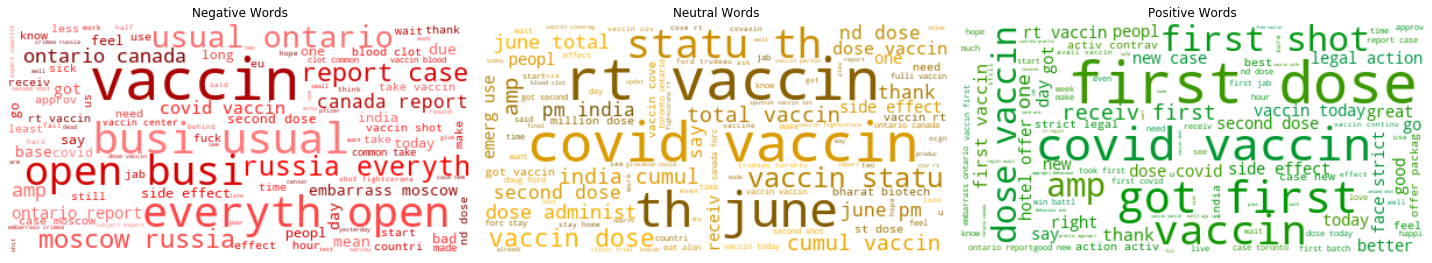

In [63]:
 generate_word_clouds(neg_tokens, neu_tokens, pos_tokens)

In [64]:
pos_docx=' '.join(pos_tokens)
neg_docx=' '.join(neg_tokens)
neu_docx=' '.join(neu_tokens)

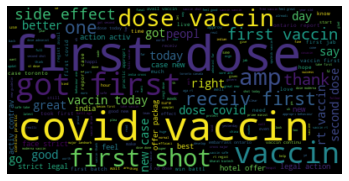

In [65]:
 plot_wordcloud(pos_docx)

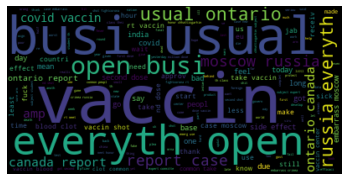

In [66]:
 plot_wordcloud(neg_docx)

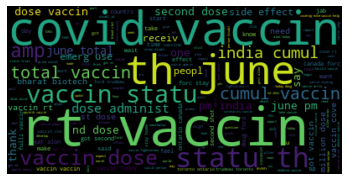

In [67]:
 plot_wordcloud(neu_docx)

In [68]:
 def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    wordcloud = WordCloud(scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

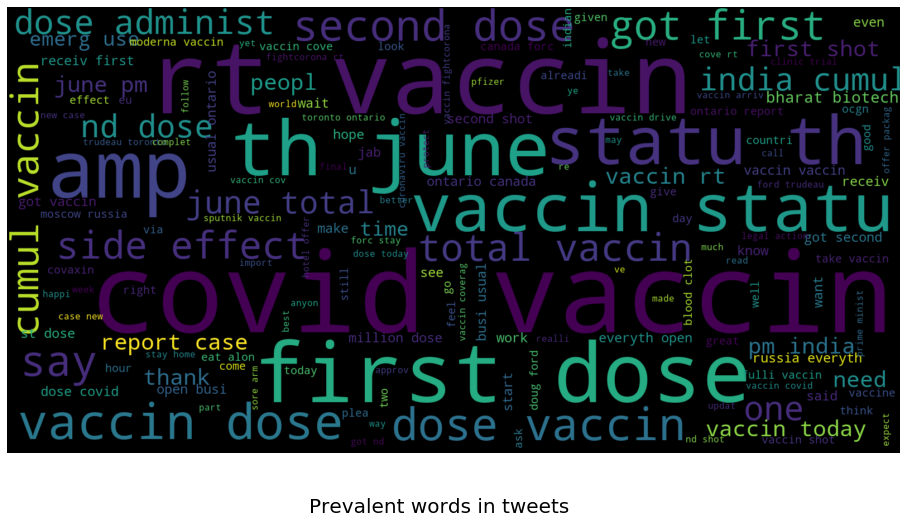

In [69]:
 show_wordcloud(tweet_df['text'] , title = 'Prevalent words in tweets')

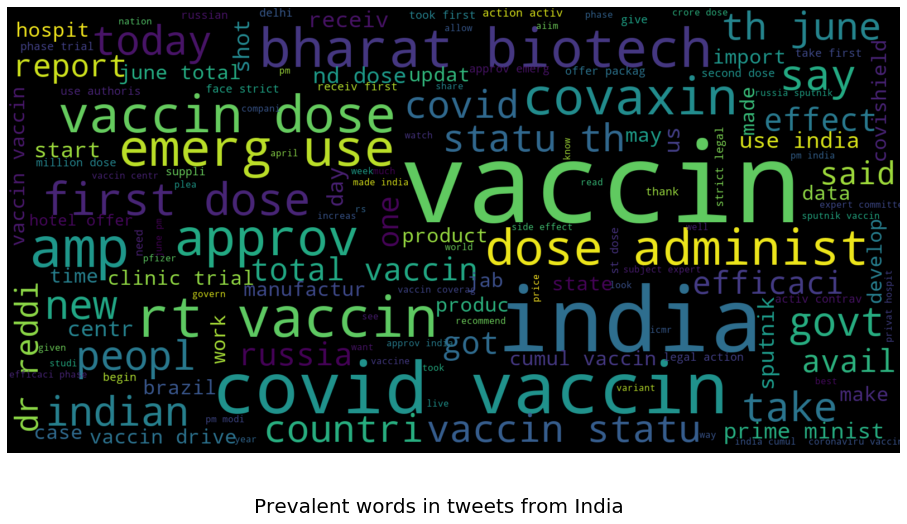

In [70]:
india_df = tweet_df.loc[tweet_df.location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

In [71]:
 tweet_df['location'].value_counts()

India                             2963
Toronto, Canada  and Worldwide    2080
New Delhi, India                  1319
Mumbai, India                      847
United States                      740
                                  ... 
 #Jabs&Jobs                          1
Halifax, England                     1
Longford, Ireland                    1
Terra Inlandia                       1
Ayr, Scotland                        1
Name: location, Length: 13954, dtype: int64

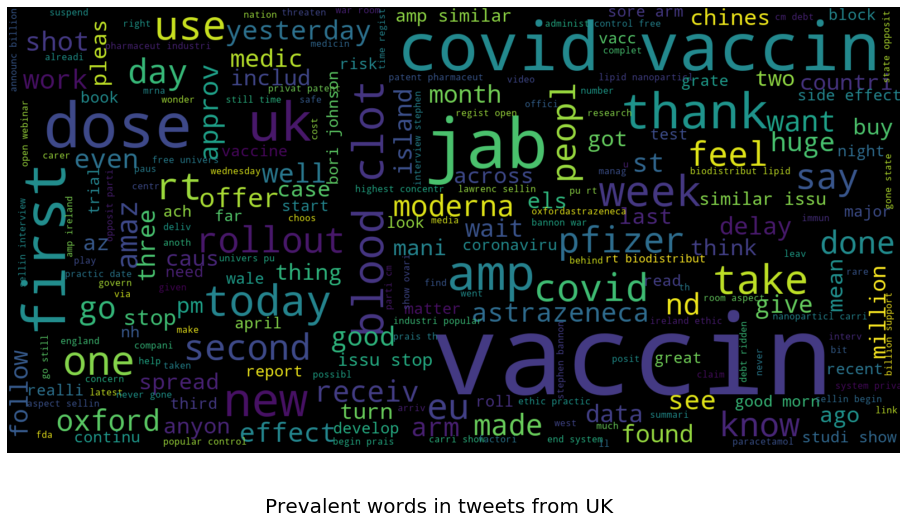

In [72]:
uk_df = tweet_df.loc[tweet_df.location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

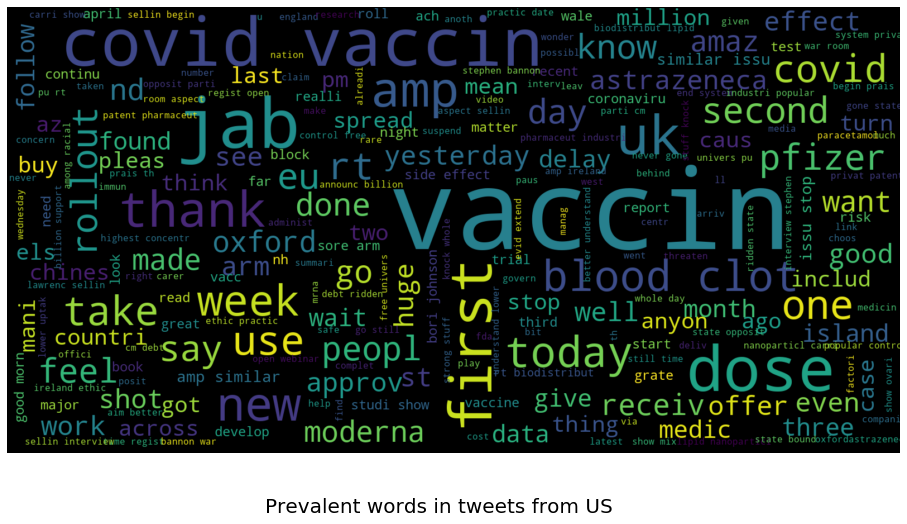

In [73]:
us_df = tweet_df.loc[tweet_df.location=="United States"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from US')

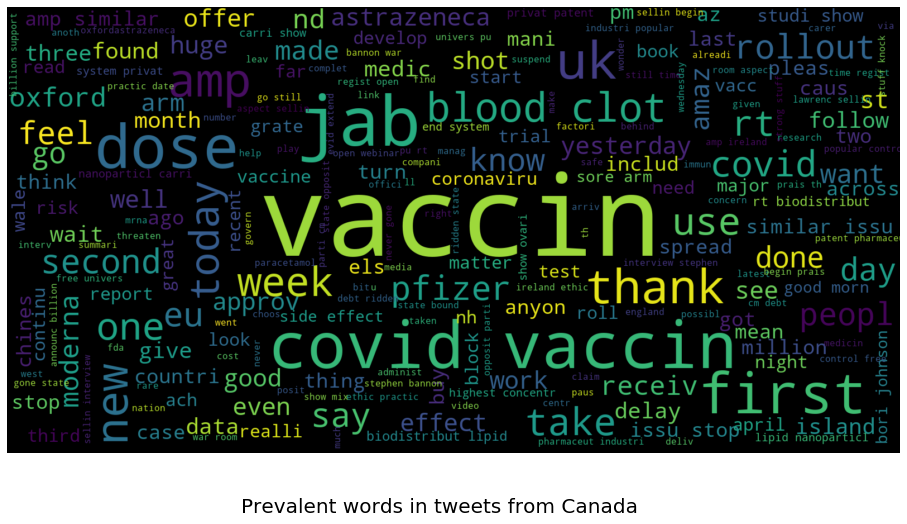

In [74]:
ca_df = tweet_df.loc[tweet_df.location=="Canada"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from Canada')

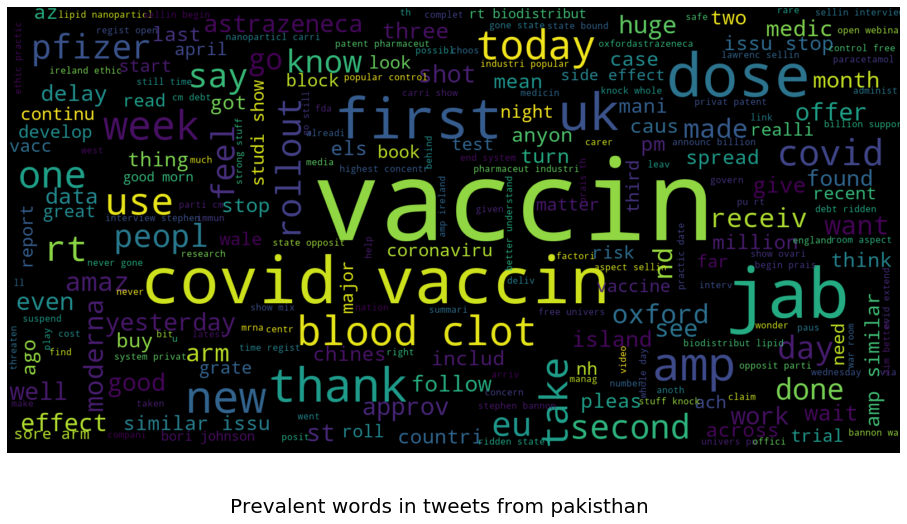

In [75]:
pa_df = tweet_df.loc[tweet_df.location=="Pakisthan"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from pakisthan')

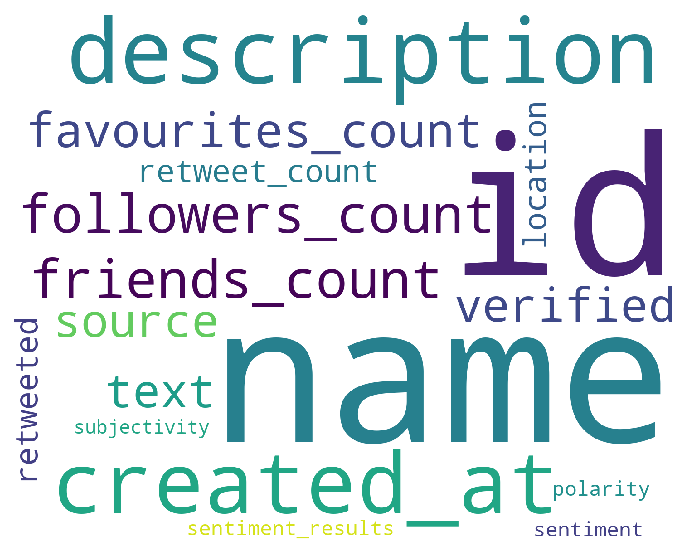

In [76]:
#attributes wordcloud
WC = WordCloud(max_words=1000, margin=10, background_color='white',scale=3, relative_scaling = 0.5, width=500, height=400,
random_state=1).generate(' '.join(tweet_df))
plt.figure(figsize=(20,10))
plt.imshow(WC)
plt.axis("off")
plt.show()